PROJECT OVERVIEW

The Syrial Customer churn project aims to address the high rate of customers attrition within the telecommunications sector.Leveraging customer data such as service plans,call activity,and account details,we will build robust classification models to predict whether a customer is likely to churn.By understanding these patterns,SyrialTel can proactively enhance customer retention strategies,improve customer satisfaction and reduce financial losses. 

Stakeholder.

The primary stakeholders are as follows:

    1.Customer retention team,interested in understanding the factors leading to customer churn in order to develop effective strategies to retain customers.
    2.Upper management.Focused on reducing churn rates to improve profitability and customer satisfaction,which are critical to the long-term success of the company

Business understanding 

SyrailTel is experiencing high customer churn,negatively affecting revenue and growth.The company seeks to understand the factors contributing to churn and develop a predictive model to identify at risk customers.By predicting churn,SyrialTel can intervene with targeted retention strategies  ensuring a more stable customer base.

Data description

1.State-The customer's location,represented as a categorical variable.

2.Account length-Duration of the customer's account in days

3.Area code-Numeric representation of the customer's area code.

4.International Plan-whether the customer has subscribed to an international calling plan

5.Voice Mail Plan-subscription status to a voicemail plan.

6.Total Day/Eve/Night/Intl calls-call counts across different time segments.

7.Total Day/Eve/Night/Intl charge-charges accrued in different time segments

8.customer service calls-number of calls made to customer service.

9.churn-the target variable indicating whether the customer has churned(True/False)


Problem statement

SyrailTel is losing customers at an alarming rate,impacting its revenue and market position.The company needs a data-driven approach to understand churn dynamics,enabling proactive measures to retain customers.The primary goal is to build a model that can accurately predict customer churn and provide actionable insights to improve retention strategies

In [2]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline 

In [3]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv') 
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Getting the data insights,by performing explatory data analysis

In [4]:
df.shape

(3333, 21)

In [5]:
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [6]:
col_names = df.columns 
col_names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Separating the dataset into categorical and numerical variables.

In [8]:
categorical = [var for var in df.columns if df[var].dtype=='O'] 
print('There are {} categorical variables\n'.format(len(categorical))) 
print('The categorical variables are :',categorical)

There are 4 categorical variables

The categorical variables are : ['state', 'phone number', 'international plan', 'voice mail plan']


In [9]:
df[categorical].head()

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


checking missing values in categorical variables

In [10]:
df[categorical].isnull().sum()

state                 0
phone number          0
international plan    0
voice mail plan       0
dtype: int64

viewing categorical variables

In [11]:
for var in categorical: 
    print(df[var].value_counts())

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64
phone number
382-4657    1
348-7071    1
389-6082    1
415-3689    1
379-2503    1
           ..
352-1127    1
368-1288    1
403-5279    1
397-9333    1
400-4344    1
Name: count, Length: 3333, dtype: int64
international plan
no     3010
yes     323
Name: count, dtype: int64
voice mail plan
no     2411
yes     922
Name: count, dtype: int64


checking for cardinality in categorical variables

In [12]:
for var in categorical: 
    print(var,'contains',len(df[var].unique()),'labels')

state contains 51 labels
phone number contains 3333 labels
international plan contains 2 labels
voice mail plan contains 2 labels


Phone number has very high cardinality which might not be useful for the model.Phone numbers are typically unique identifiers and don't provide meaningful information for prediction.I might consider dropping it.


In [13]:
df.drop('phone number',axis = 1,inplace = True)

Feature engineering

In [14]:
print('State contains',len(df['state'].unique()),'labels')

State contains 51 labels


checking labels in state variable

In [15]:
df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

checking for frequency distribution of values in state variable

In [16]:
df['state'].value_counts()

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

exploring international plan variable

In [17]:
print('International plan contains',len(df['international plan'].unique()),'labels')

International plan contains 2 labels


checking frequency distribution of values in international 

In [18]:
df['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

In [19]:
pd.get_dummies(df['international plan'],drop_first=False,dtype='int').head()

,no,yes
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


exploring voice mail plan variable

In [20]:
print('voice mail plan contains',len(df['voice mail plan'].unique()),'labels')

voice mail plan contains 2 labels


In [21]:

df['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

In [22]:
pd.get_dummies(df['voice mail plan'],drop_first=False,dtype = 'int').head()


,no,yes
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


frequency of categorical features

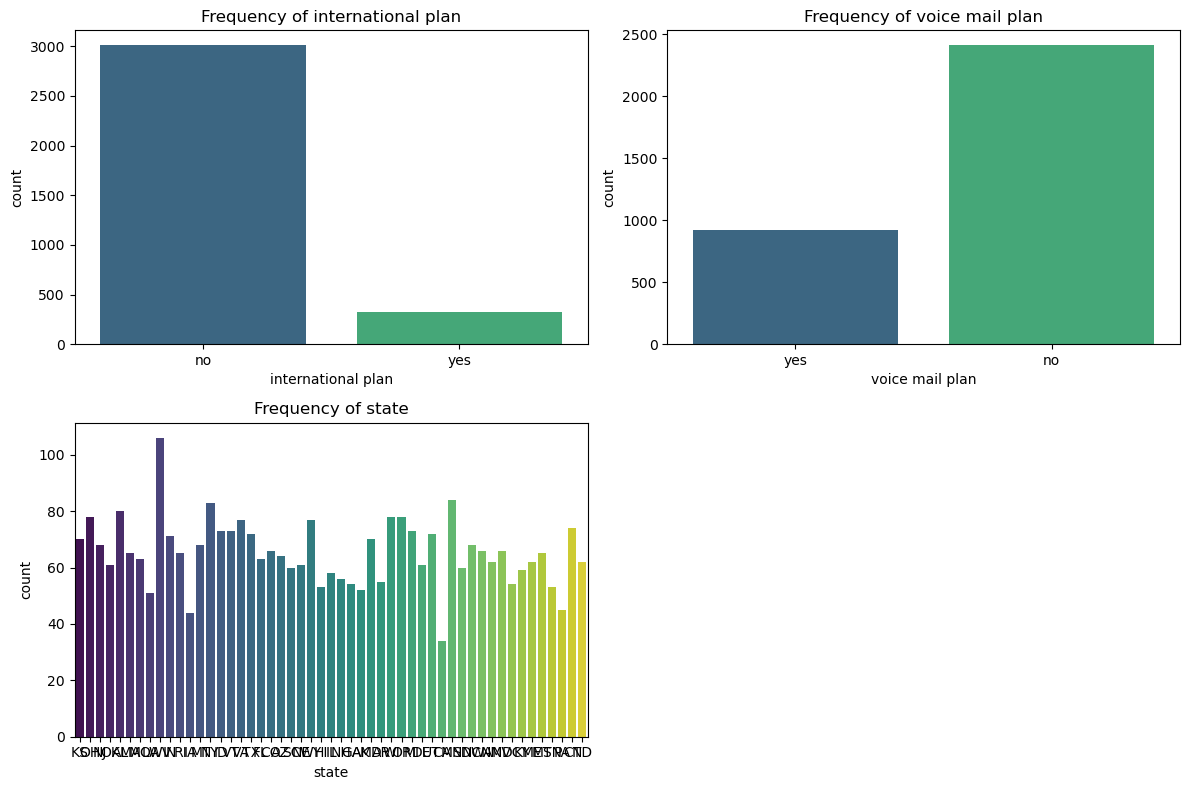

In [23]:
import seaborn as sns 
categorical_features = ['international plan','voice mail plan','state'] 
plt.figure(figsize=(12,8)) 
for i,feature in enumerate(categorical_features,1): 
    plt.subplot(2,2,i) 
    sns.countplot(data = df,x=feature,palette = 'viridis') 
    plt.title(f'Frequency of {feature}') 
plt.tight_layout() 
plt.show()

Observation
1.International plan-a large majority of customers do not have an international plan.Only a small fraction of the customers have subscribed to it. 
This skewed distribution suggests that having an international plan is not common among customers.This variable could still be significant if having an international plan correlates with churn,especially if customers with the plan are more or less likely to churn.
2.Voice mail plan.
Most customers do not have a voicemail plan,while a smaller proportion does have one.Similar to international plan,the voice mail plan is less frequently used among customers.Analyzing the relationship between having a voicemail plan and churn will help determine if this feature plays a role in predicting churn. 
3.State.
the state var shows a fairly even distribution across various states,with some states having slightly more customers than others.The state variable doesn't show any extreme imbalances,However the relationship between different states and churn can reveal if behavior,possibly due to regional service quality or marketing strategies


Cross-tabulation with churn

In [24]:
#international plan vs Churn 
international_plan_ct = pd.crosstab(df['international plan'],df['churn']) 
print(international_plan_ct) 
#voice mail plan vs churn
voice_mail_plan_ct = pd.crosstab(df['voice mail plan'],df['churn']) 
print(voice_mail_plan_ct) 
#state vs churn 
state_ct = pd.crosstab(df['state'],df['churn']) 
print(state_ct)

churn               False  True 
international plan              
no                   2664    346
yes                   186    137
churn            False  True 
voice mail plan              
no                2008    403
yes                842     80
churn  False  True 
state              
AK        49      3
AL        72      8
AR        44     11
AZ        60      4
CA        25      9
CO        57      9
CT        62     12
DC        49      5
DE        52      9
FL        55      8
GA        46      8
HI        50      3
IA        41      3
ID        64      9
IL        53      5
IN        62      9
KS        57     13
KY        51      8
LA        47      4
MA        54     11
MD        53     17
ME        49     13
MI        57     16
MN        69     15
MO        56      7
MS        51     14
MT        54     14
NC        57     11
ND        56      6
NE        56      5
NH        47      9
NJ        50     18
NM        56      6
NV        52     14
NY        68     15
OH      

countplots for categorical variables vs churn

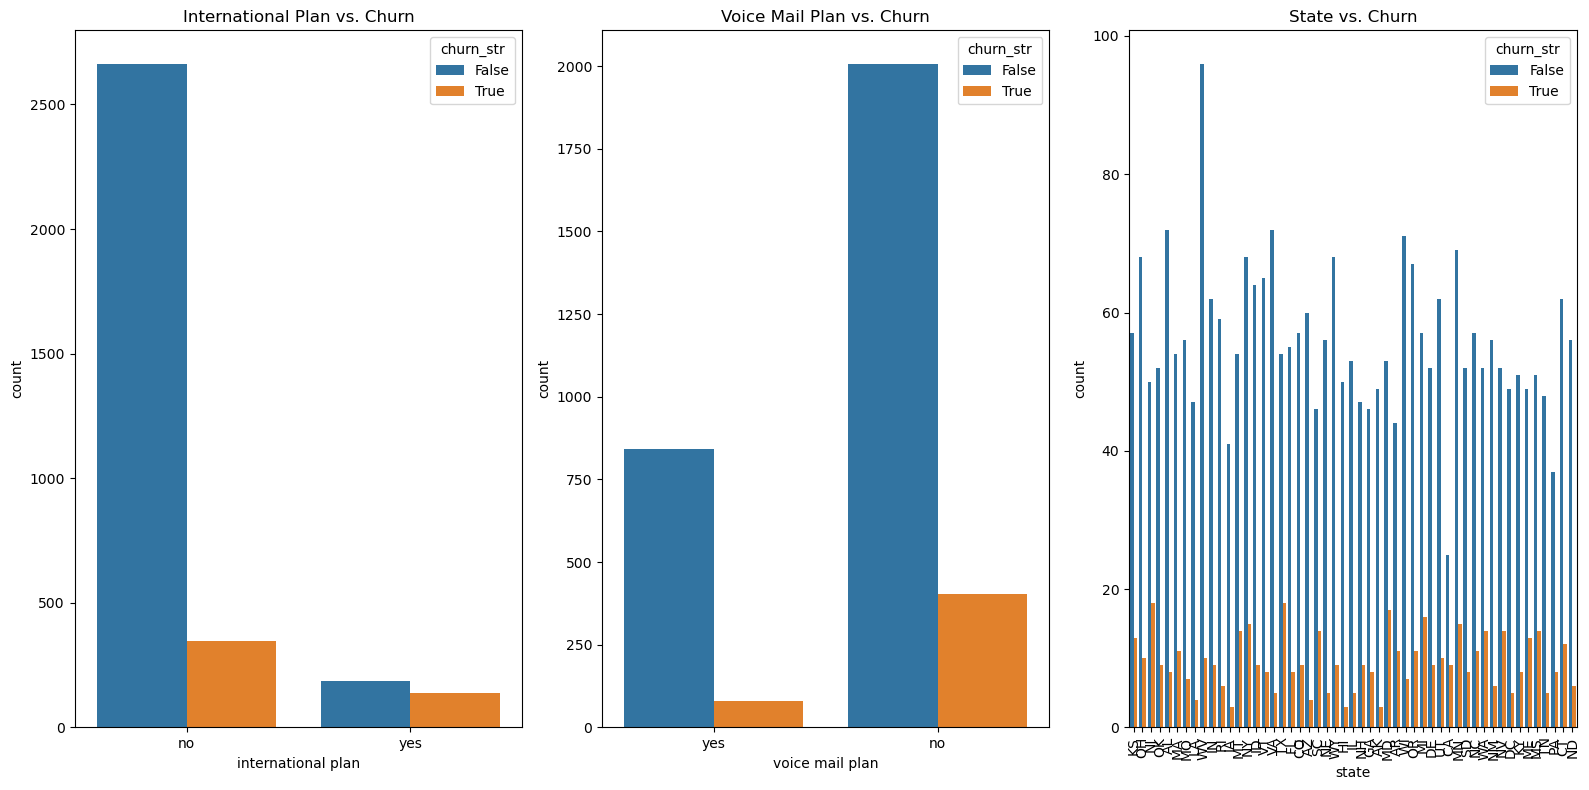

In [25]:
df['churn_str']  = df['churn'].astype(str)
# Set up the figure size
plt.figure(figsize=(16, 8))

# Count plot for International Plan vs. Churn
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='international plan', hue='churn_str')
plt.title('International Plan vs. Churn')

# Count plot for Voice Mail Plan vs. Churn
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='voice mail plan', hue='churn_str')
plt.title('Voice Mail Plan vs. Churn')

# Count plot for State vs. Churn (rotated x-axis labels for better readability)
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='state', hue='churn_str')
plt.title('State vs. Churn')
plt.xticks(rotation=90)

plt.tight_layout() 
plt.show()

Interpretation of the plots

International plan vs churn.
Customers without the international plan are significantly less likely to churn compared to those with the plan.A higher proportion of customers with the international plan churn compared to those without it,indicating that having an international plan is associated with higher churn rates.

Voice mail plan vs churn.
Customers with the voice mail plan are less likely to churn compared to those without it.The churn rate is higher among customers who do not have the voice mail plan,suggesting that not having this plan might be associated with increased churn. 

State vs churn
The churn rates are fairly consistent across different states,with no particular state showing an extremely high or low churn rate compared to others. 
The variation in churn rates across states does not seem substantial,suggesting that the state variable might not be a strong predictor of churn.



Conclusion-
State variable,given the visual analysis,the state does not appear to have a significant impact on churn.as there is no clear pattern or significant differences in churn rates across states.Dropping the variable might be appropriate inorder to simplify the model
International and Voice mail plans,these variables show clear differences in churn rates,making them important features to include in this analysis or predictive model 

Exploring numerical variables

In [26]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 17 numerical variables

The numerical variables are : ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [27]:
df[numerical].head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [28]:
df[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [29]:
df[numerical].describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [30]:
print(round(df[numerical].describe()),2)

       account length  area code  number vmail messages  total day minutes  \
count          3333.0     3333.0                 3333.0             3333.0   
mean            101.0      437.0                    8.0              180.0   
std              40.0       42.0                   14.0               54.0   
min               1.0      408.0                    0.0                0.0   
25%              74.0      408.0                    0.0              144.0   
50%             101.0      415.0                    0.0              179.0   
75%             127.0      510.0                   20.0              216.0   
max             243.0      510.0                   51.0              351.0   

       total day calls  total day charge  total eve minutes  total eve calls  \
count           3333.0            3333.0             3333.0           3333.0   
mean             100.0              31.0              201.0            100.0   
std               20.0               9.0               51

In [31]:
class BoxplotVisualizer: 
    def __init__(self,dataframe): 
        self.dataframe = dataframe 
        
    def draw_boxplots(self):
        sns.set(style="whitegrid")
        for column in self.dataframe.select_dtypes(include='number').columns:
            plt.figure(figsize=(10,5)) 
            sns.boxplot(x=self.dataframe[column]) 
            plt.title(f'Boxplot of {column}') 
            plt.xlabel(column) 
            plt.show()

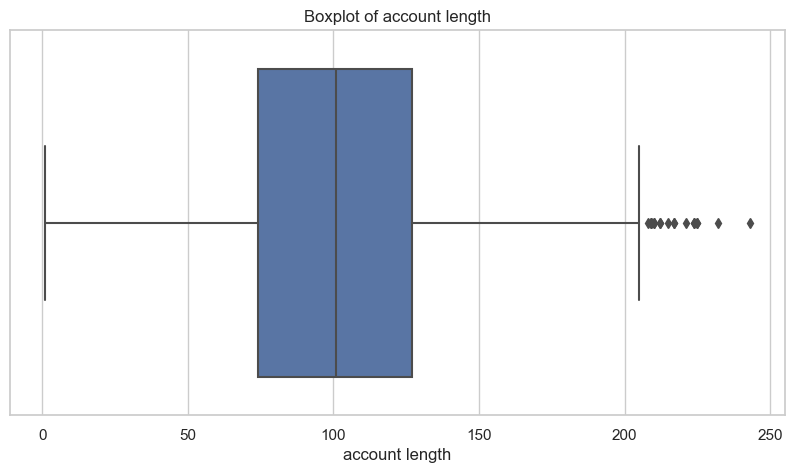

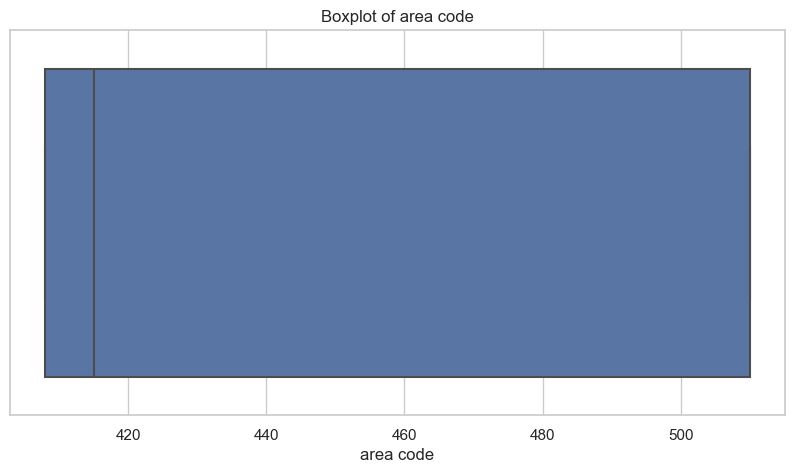

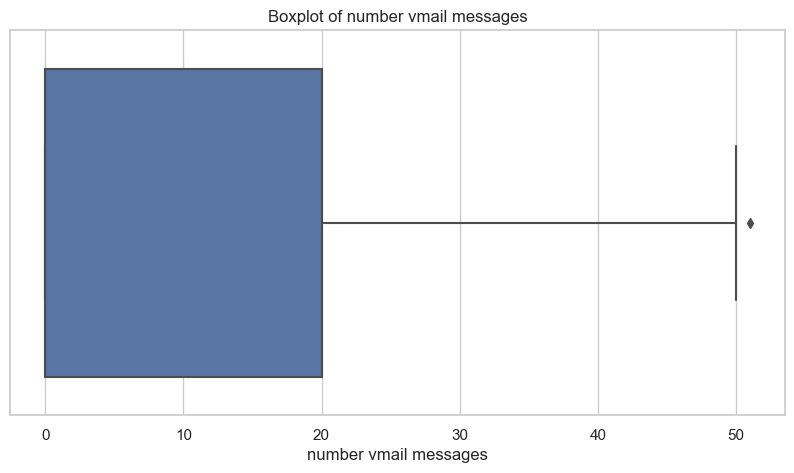

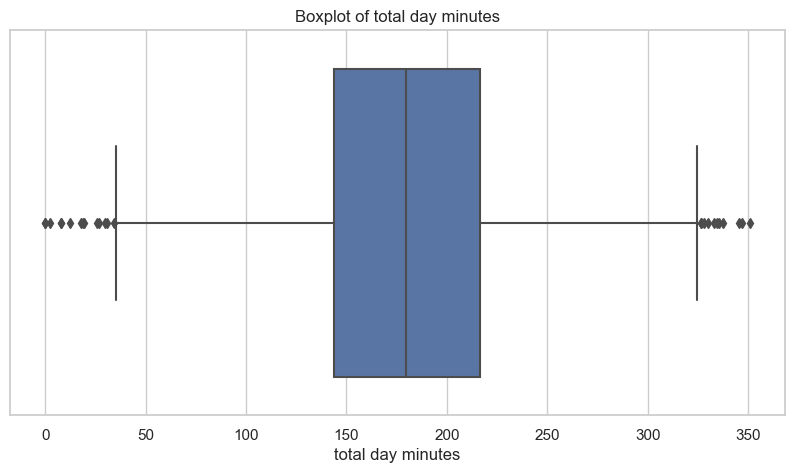

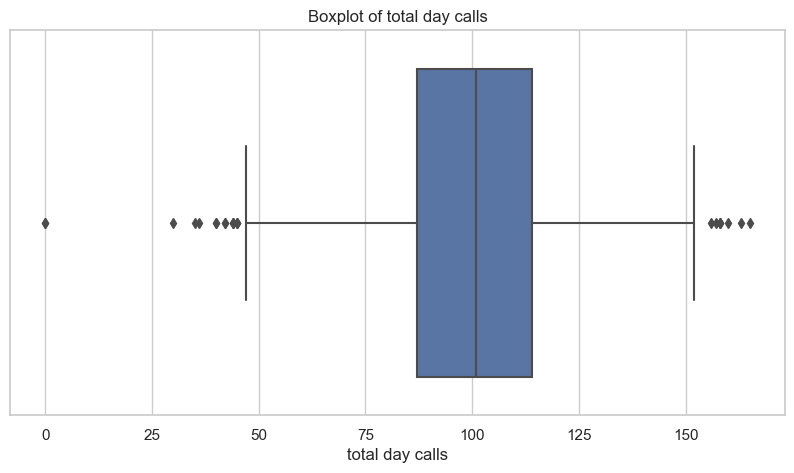

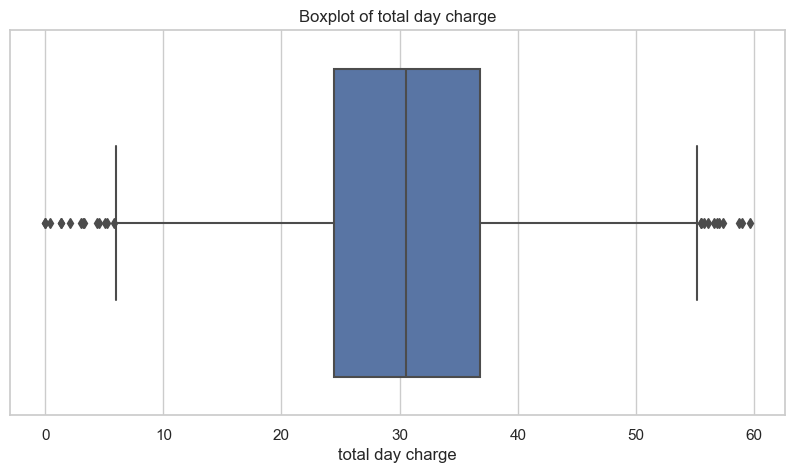

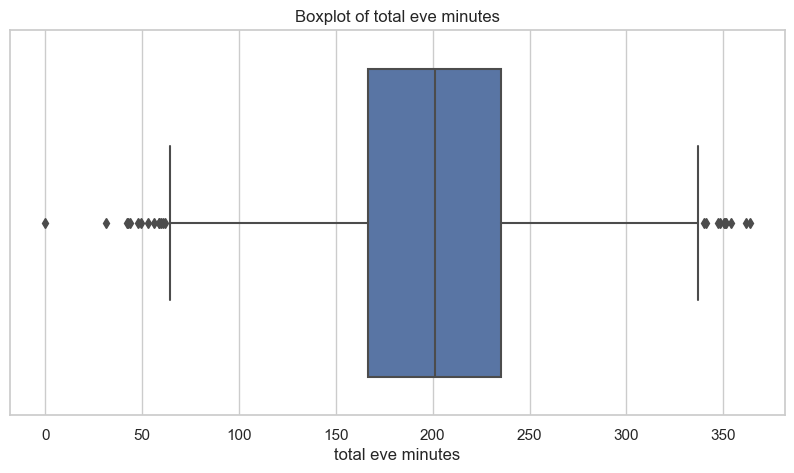

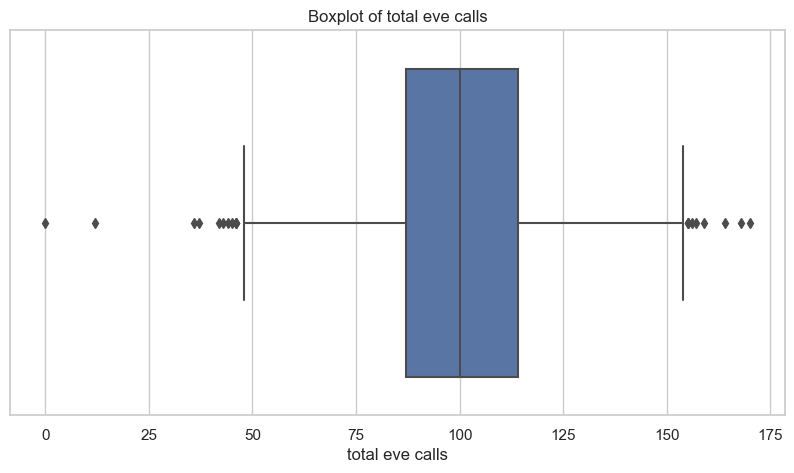

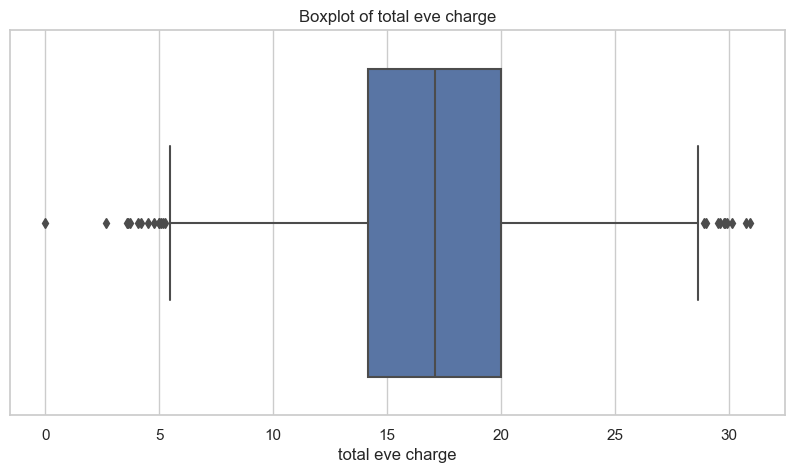

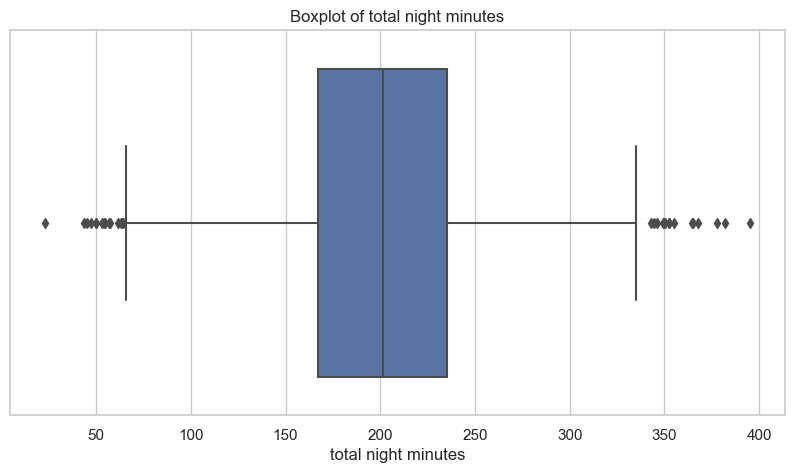

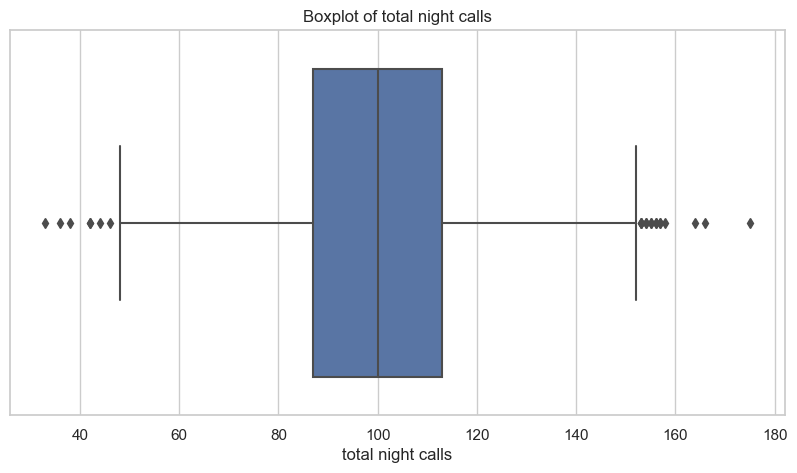

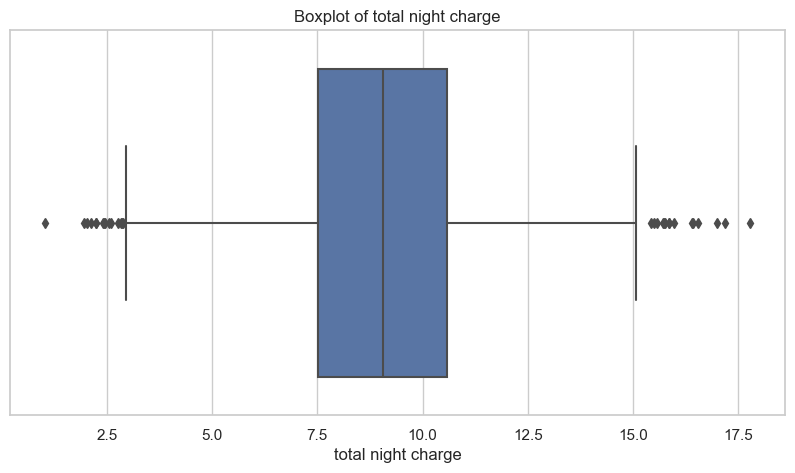

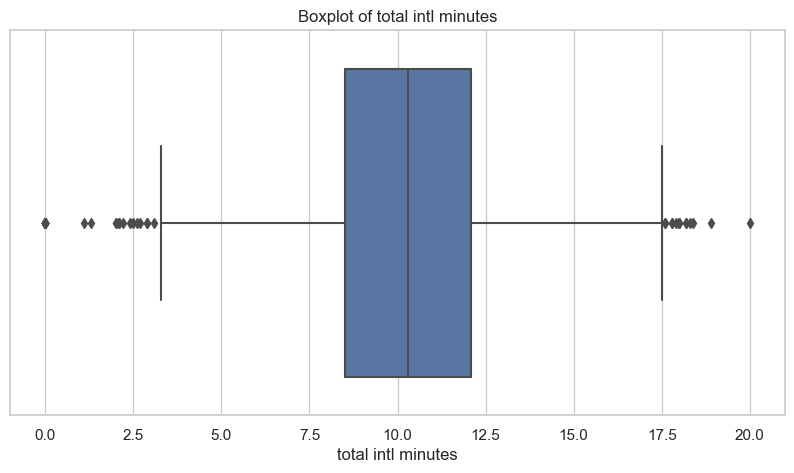

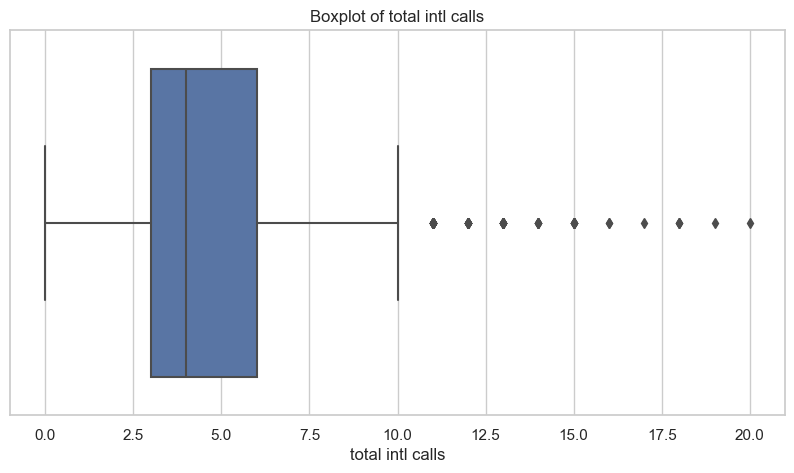

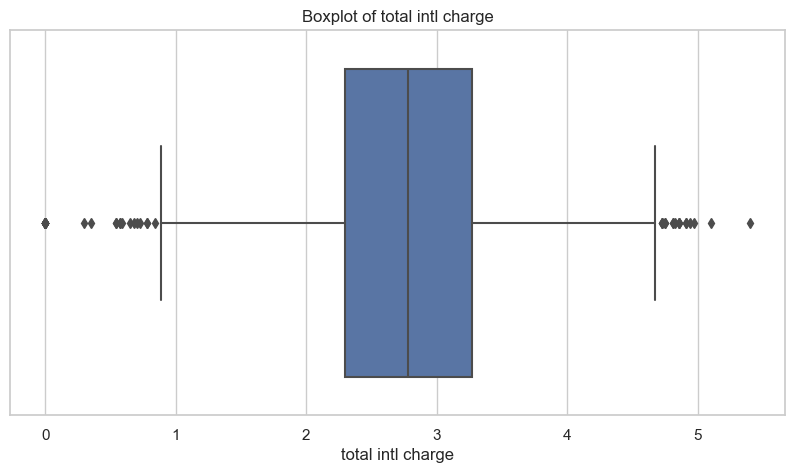

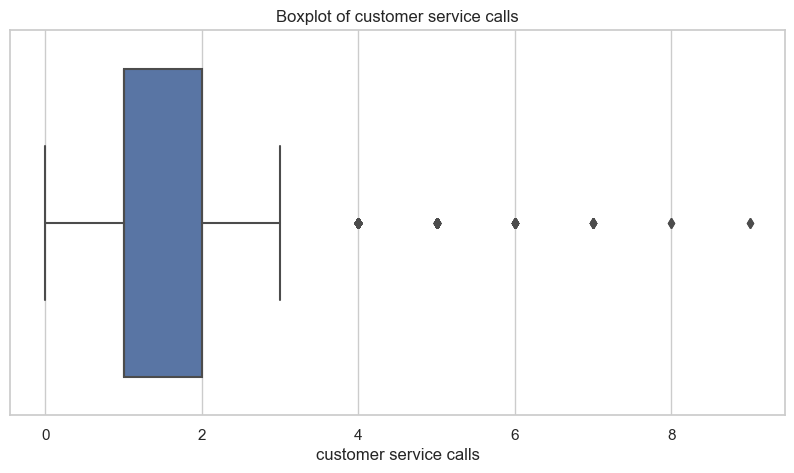

In [32]:
visualizer = BoxplotVisualizer(df[numerical]) 
visualizer.draw_boxplots()

Check distribution of variable

plotting histograms to find out if they are skewed or normal,so if they normal i will do extreme value analysis and if skewed i will find the IQR

In [33]:
from scipy.stats import norm,skew 
class DistributionAnalyzer: 
    def __init__(self,dataframe):
        self.dataframe = dataframe 
    def check_distribution(self):
        sns.set(style='whitegrid') 
        for column in self.dataframe.select_dtypes(include='number').columns: 
            plt.figure(figsize=(10,5)) 
            sns.histplot(self.dataframe[column],kde=True) 
            #checking skewness
            skewness = self.dataframe[column].skew() 
            plt.title(f'Distribution of {column} (Skewness: {skewness:.2f})') 
            plt.xlabel(column) 
            plt.ylabel('Frequency') 
            plt.show()  
            
            #analyzing distribution 
            if abs(skewness) < 0.5: 
                print(f'{column} is approximately normally distributed.Consider extreme value analysis.')
            else:
                print(f'{column} is skewed. Consider using IQR for outlier detection.')
    def find_IQR(self,column): 
        Q1 = self.dataframe[column].quantile(0.25) 
        Q3 = self.dataframe[column].quantile(0.75) 
        IQR = Q3-Q1
        print(f'IQR for {column}: {IQR}') 
        return IQR           
            

c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


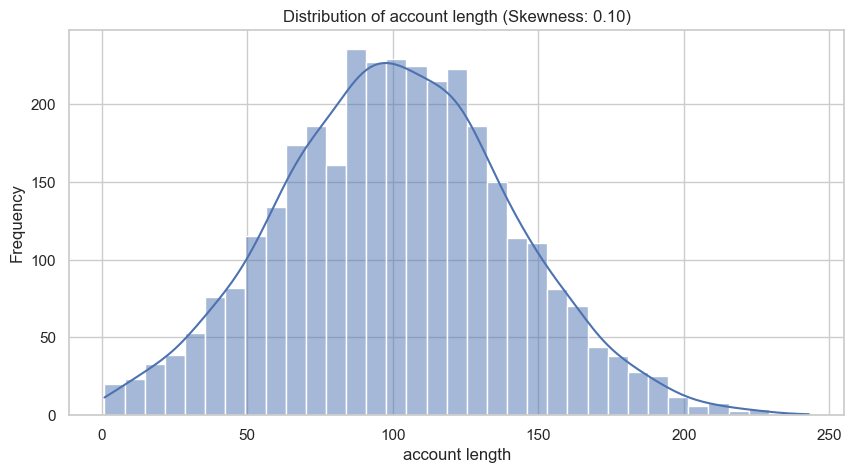

account length is approximately normally distributed.Consider extreme value analysis.


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


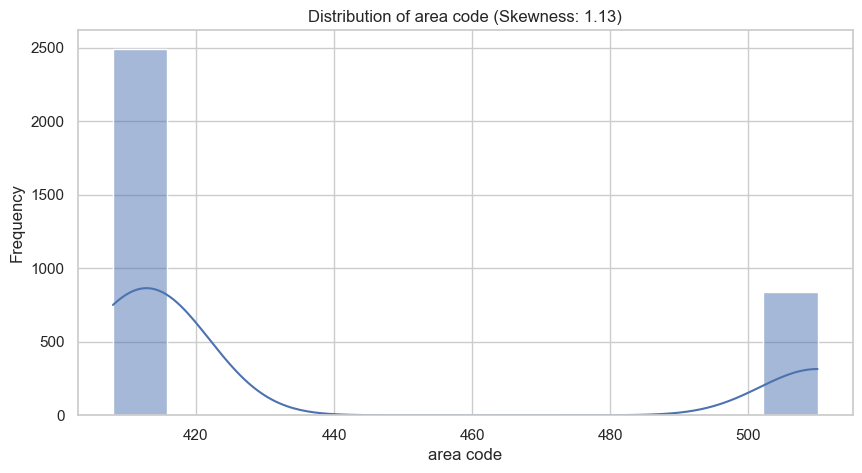

area code is skewed. Consider using IQR for outlier detection.


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


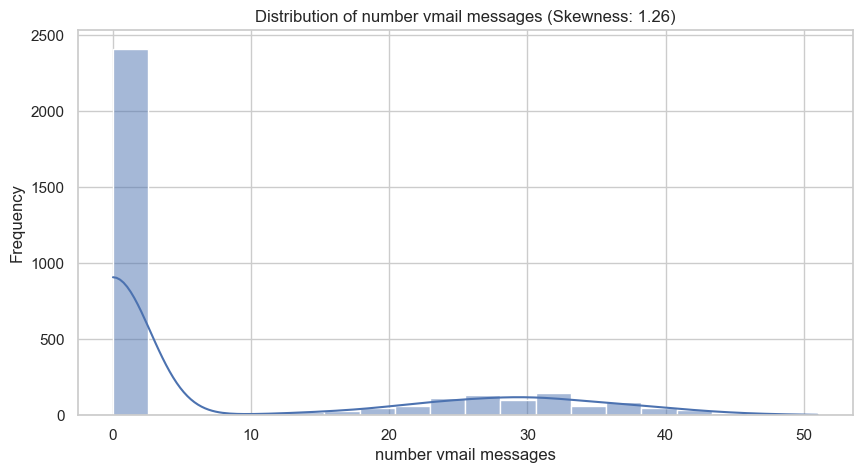

number vmail messages is skewed. Consider using IQR for outlier detection.


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


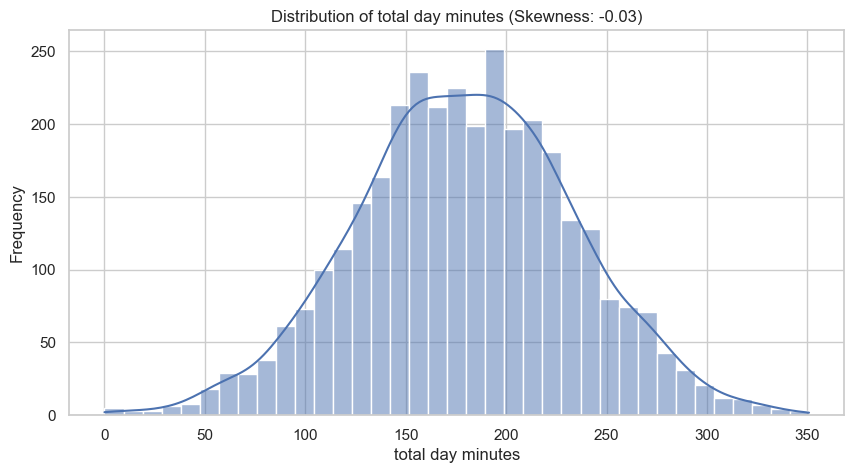

total day minutes is approximately normally distributed.Consider extreme value analysis.


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


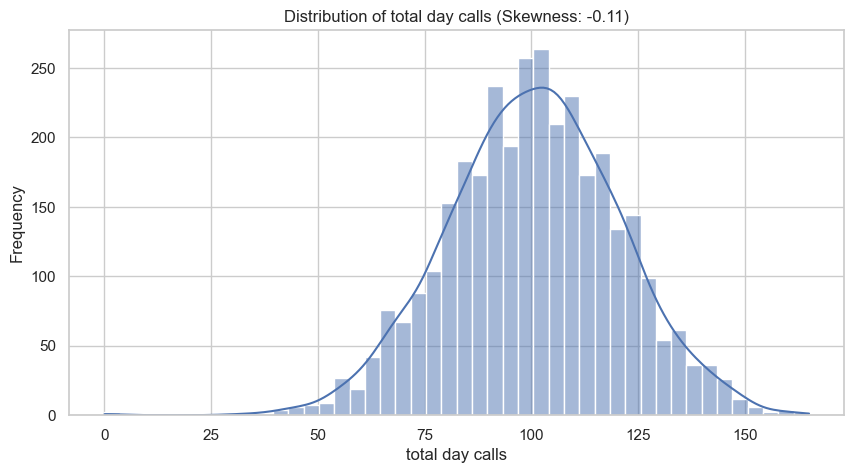

total day calls is approximately normally distributed.Consider extreme value analysis.


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


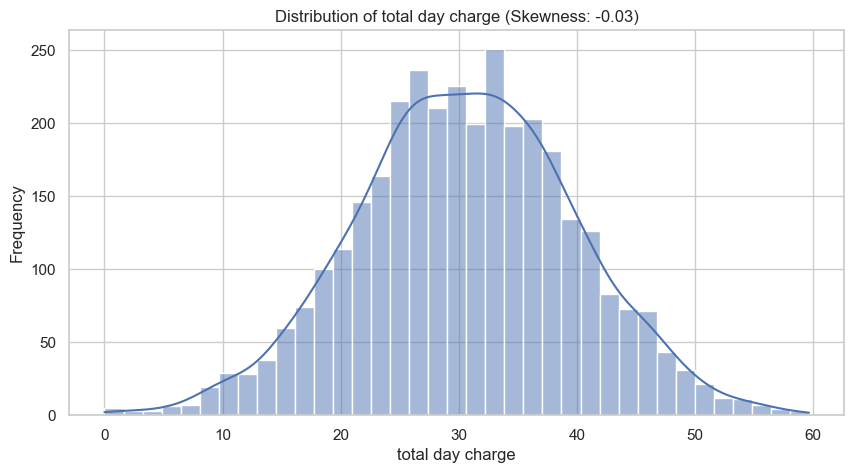

total day charge is approximately normally distributed.Consider extreme value analysis.


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


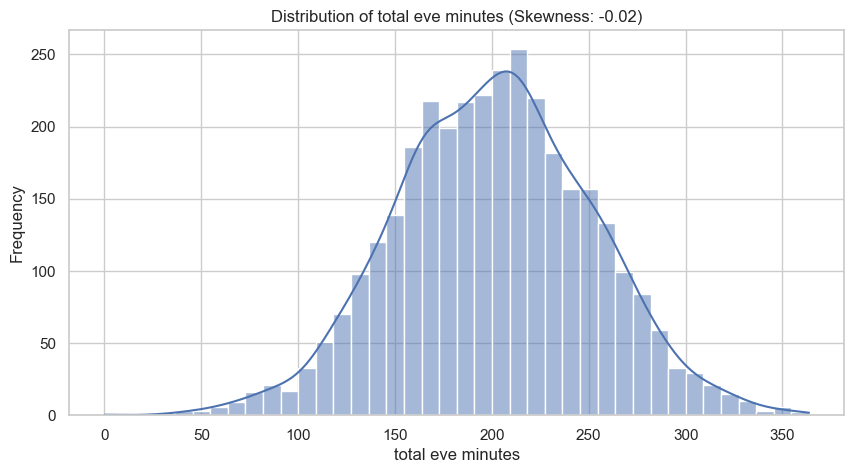

total eve minutes is approximately normally distributed.Consider extreme value analysis.


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


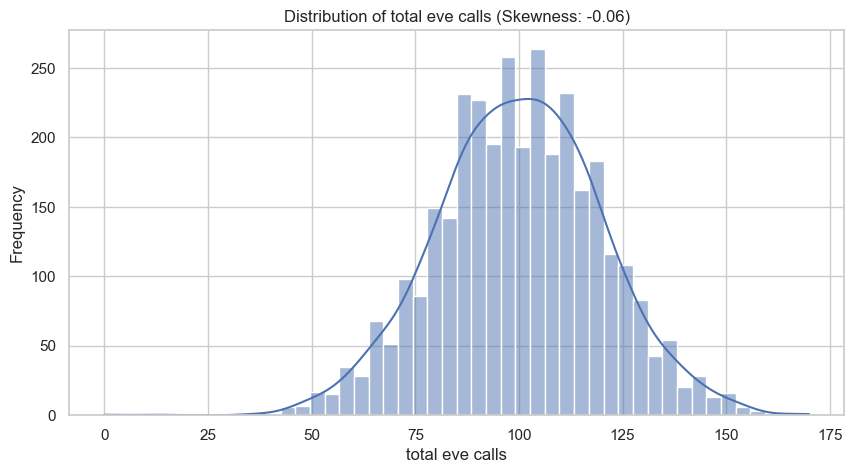

total eve calls is approximately normally distributed.Consider extreme value analysis.


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


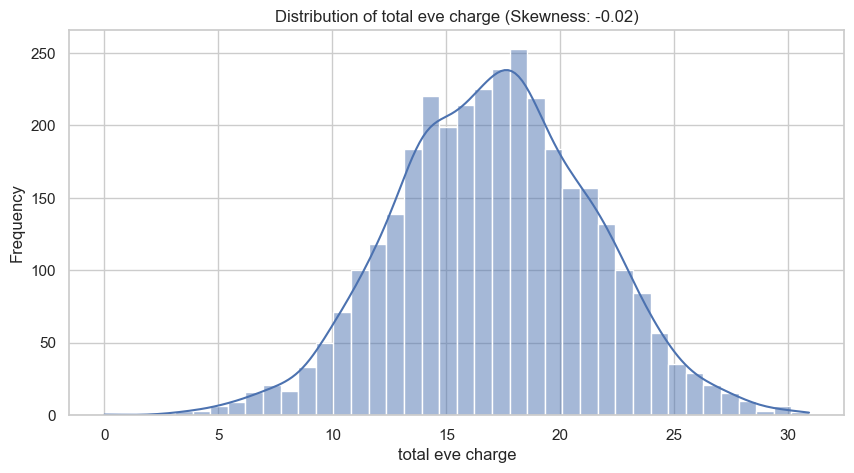

total eve charge is approximately normally distributed.Consider extreme value analysis.


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


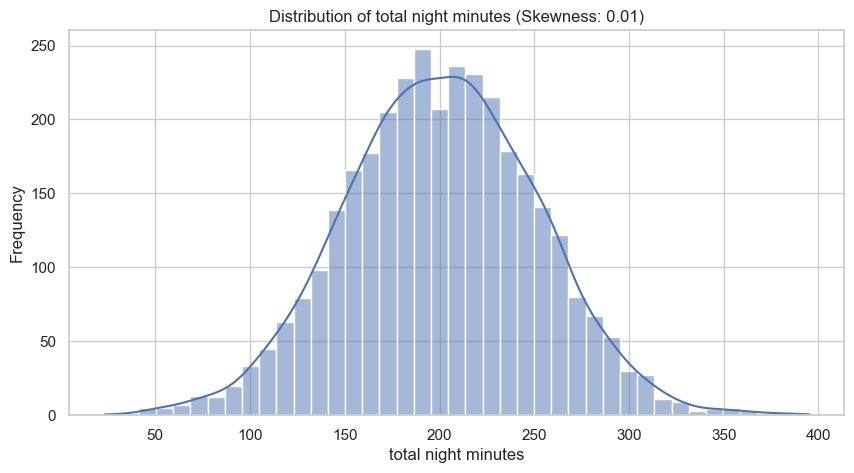

total night minutes is approximately normally distributed.Consider extreme value analysis.


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


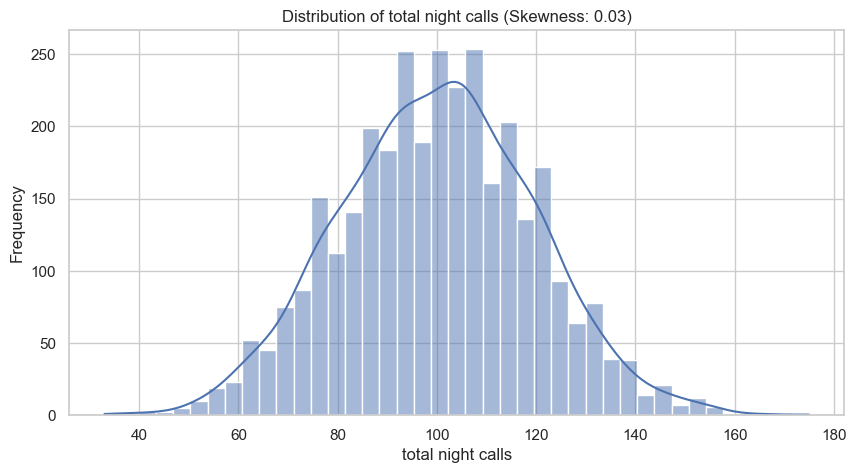

total night calls is approximately normally distributed.Consider extreme value analysis.


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


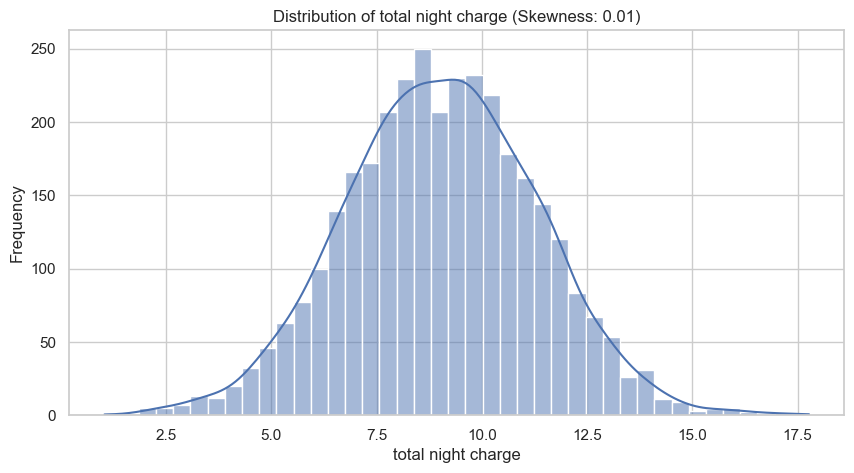

total night charge is approximately normally distributed.Consider extreme value analysis.


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


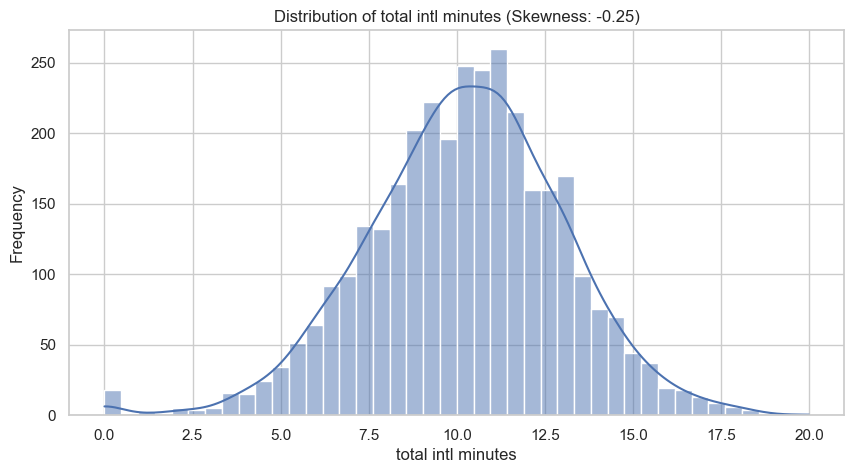

total intl minutes is approximately normally distributed.Consider extreme value analysis.


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


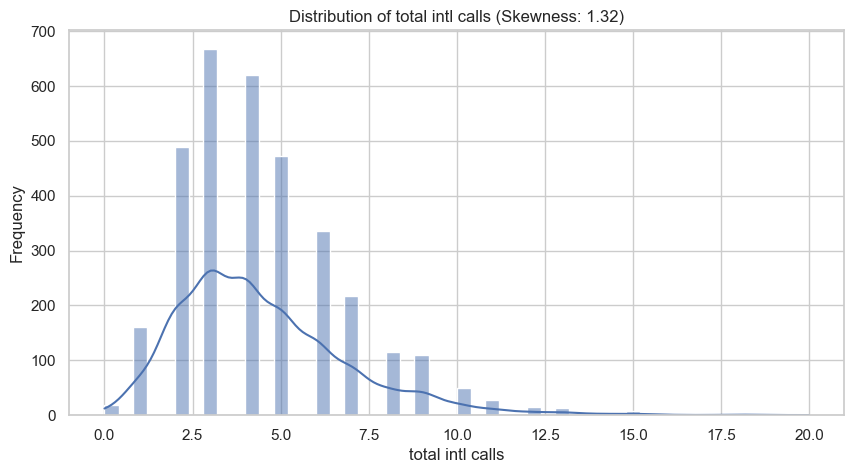

total intl calls is skewed. Consider using IQR for outlier detection.


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


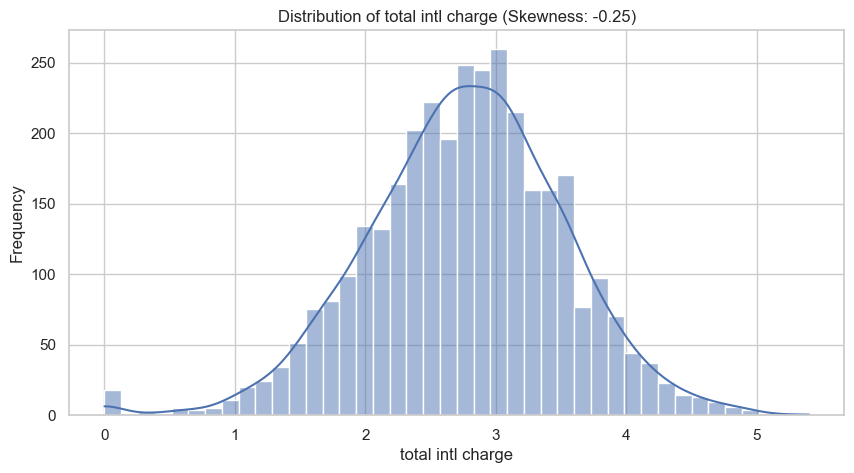

total intl charge is approximately normally distributed.Consider extreme value analysis.


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


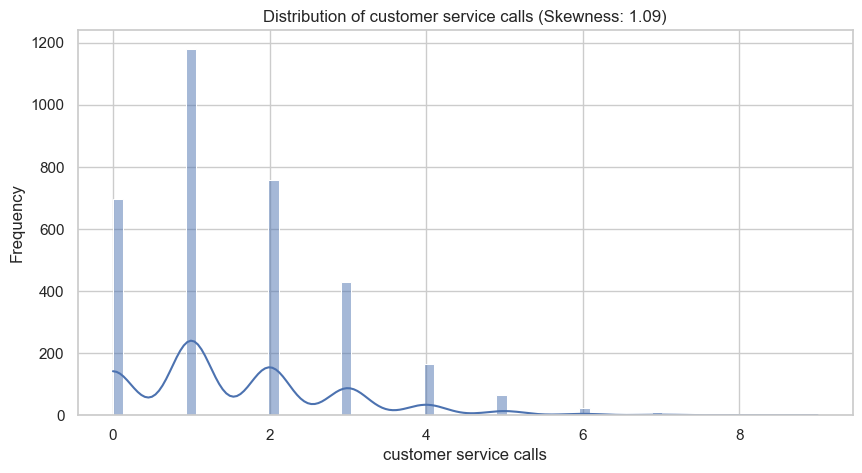

customer service calls is skewed. Consider using IQR for outlier detection.


In [34]:
analyzer = DistributionAnalyzer(df[numerical]) 
analyzer.check_distribution()

Handling normal outliers

In [35]:
from scipy.stats import zscore 

def handle_normal_outliers(df, columns): 
    for column in columns:
        df[f'{column}_zscore'] = zscore(df[column]) 
        outliers = df[(df[f'{column}_zscore'] > 3) | (df[f'{column}_zscore'] < -3)] 
        print(f'{column} has {len(outliers)} outliers.') 
    
    return df.drop([f'{column}_zscore' for column in columns], axis=1 ) 

normal_columns = [
    'account length', 'total day minutes', 'total day calls', 'total day charge', 
    'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 
    'total night calls', 'total night charge', 'total intl minutes', 'total intl charge'
]

df = handle_normal_outliers(df, normal_columns)

account length has 7 outliers.
total day minutes has 9 outliers.
total day calls has 9 outliers.
total day charge has 9 outliers.
total eve minutes has 9 outliers.
total eve calls has 7 outliers.
total eve charge has 9 outliers.
total night minutes has 11 outliers.
total night calls has 6 outliers.
total night charge has 11 outliers.
total intl minutes has 22 outliers.
total intl charge has 22 outliers.


In [36]:
from scipy.stats import zscore 
class NormalOutlierDetector: 
    def __init__(self, dataframe): 
        self.dataframe = dataframe 
    def find_outliers_zscore(self, column, threshold=3):
        z_scores = zscore(self.dataframe[column])
        lower_fence = self.dataframe[column].mean() - threshold * self.dataframe[column].std()
        upper_fence = self.dataframe[column].mean() + threshold * self.dataframe[column].std()
        print(f'{column} outliers are values < {lower_fence} or > {upper_fence}')
        return lower_fence, upper_fence 

normal_outlier_detector = NormalOutlierDetector(df) 
for column in normal_columns: 
    normal_outlier_detector.find_outliers_zscore(column) 

account length outliers are values < -18.401511305138754 or > 220.53112426643486
total day minutes outliers are values < 16.372929902636656 or > 343.1772651168652
total day calls outliers are values < 40.22839094245388 or > 160.642896186259
total day charge outliers are values < 2.7840035689315528 or > 58.3406108925146
total eve minutes outliers are values < 48.838814757367714 or > 353.1218813122392
total eve calls outliers are values < 40.34643554931384 or > 159.88218731297238
total eve charge outliers are values < 4.151537424704387 or > 30.01554328336642
total night minutes outliers are values < 49.15049616274547 or > 352.59357824469527
total night calls outliers are values < 41.401882732901264 or > 158.81353880925295
total night charge outliers are values < 2.2117064195131544 or > 15.866943445473344


total intl minutes outliers are values < 1.861775084147677 or > 18.6128123745982
total intl charge outliers are values < 0.5032636201566785 or > 5.02589929613495


Handling skewed outliers

In [37]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'churn_str'],
      dtype='object')

In [38]:
def handle_skewed_outliers(df, columns): 
    for column in columns: 
        Q1 = df[column].quantile(0.25) 
        Q3 = df[column].quantile(0.75) 
        IQR = Q3 - Q1 
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))] 
        print(f'{column} has {len(outliers)} outliers.') 
    return df     
skewed_columns = ['area code','number vmail messages','total intl charge','customer service calls'] 

df = handle_skewed_outliers(df, skewed_columns)

area code has 0 outliers.
number vmail messages has 1 outliers.
total intl charge has 49 outliers.
customer service calls has 267 outliers.


In [39]:
class OutlierDetector:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def find_outliers_iqr(self, column):
        IQR = self.dataframe[column].quantile(0.75) - self.dataframe[column].quantile(0.25)
        lower_fence = self.dataframe[column].quantile(0.25) - (IQR * 3)
        upper_fence = self.dataframe[column].quantile(0.75) + (IQR * 3)
        print(f'{column} outliers are values < {lower_fence} or > {upper_fence}')
        return lower_fence, upper_fence

# Example Usage
outlier_detector = OutlierDetector(df)

# Replace 'column_name' with your actual column name
for column in skewed_columns:
    outlier_detector.find_outliers_iqr(column)


area code outliers are values < 102.0 or > 816.0
number vmail messages outliers are values < -60.0 or > 80.0
total intl charge outliers are values < -0.6100000000000008 or > 6.180000000000001
customer service calls outliers are values < -2.0 or > 5.0


Churn distribution

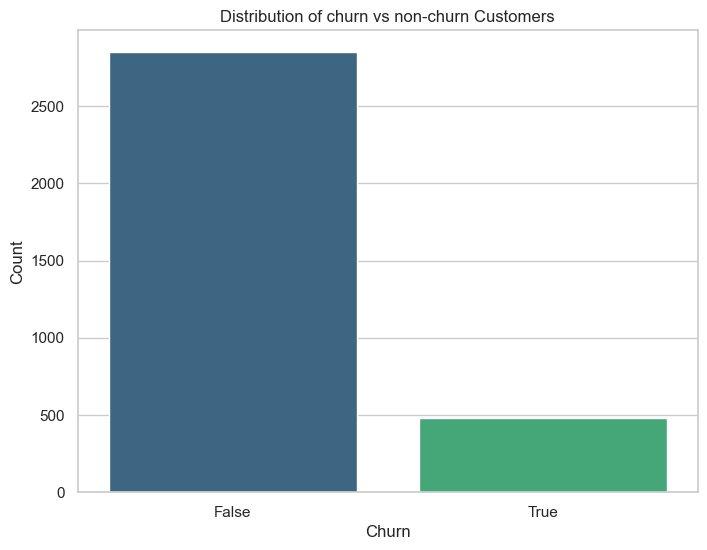

In [40]:
plt.figure(figsize=(8,6)) 
sns.countplot(x='churn',data = df,palette='viridis')  
plt.title('Distribution of churn vs non-churn Customers') 
plt.xlabel('Churn') 
plt.ylabel('Count') 
plt.savefig('Images/churn_distribution.png') 
plt.show()           


Correlation heatmap

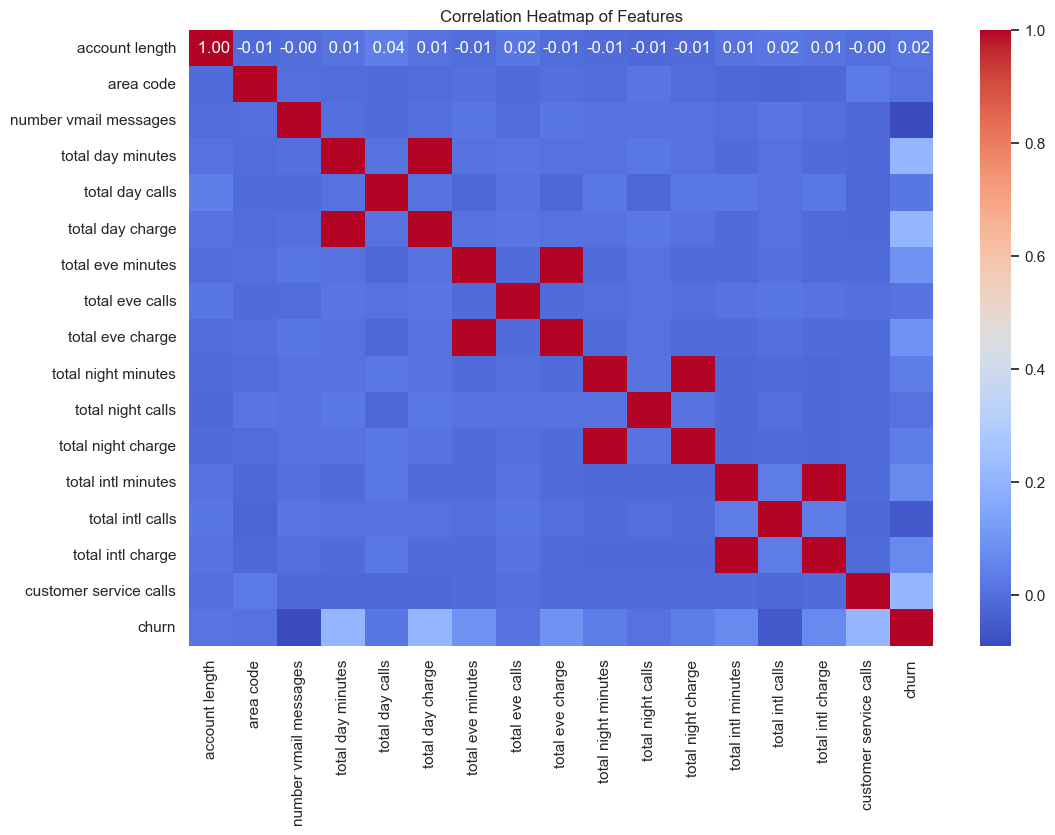

In [41]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df[numerical].corr(), annot=True, cmap='coolwarm', fmt=' .2f') 
plt.title('Correlation Heatmap of Features') 
plt.savefig('Images/correlation_heatmap.png') 
plt.show()

Declaring feature vector and target variable

In [42]:
df.drop('churn_str' ,axis=1, inplace=True)

In [43]:
X = df.drop('churn', axis= 1) 
y = df['churn']


In [44]:
print(y.unique()) 
y = y.map({True:1, False: 0}) 
y = y.replace({'SomeString': 0}) 
y = y.astype(int)

[False  True]


Splitting data into separate training and test set

In [45]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [46]:
X_train.shape,X_test.shape

((2666, 19), (667, 19))

Feature engineering-displaying categorical and numerical variables separately

In [47]:
X_train.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
dtype: object

In [48]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O'] 
categorical

['state', 'international plan', 'voice mail plan']

In [49]:
numerical = [col for col in X_train.columns if X_train[col].dtypes !='O'] 
numerical

['account length',
 'area code',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

In [50]:
X_train[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

In [51]:
X_test[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

Handling outliers

In [52]:
# Define the thresholds for outliers
lower_thresholds = {
    'account length': -18.401511305138754,
    'total day minutes': 16.372929902636656,
    'total day calls': 40.22839094245388,
    'total day charge': 2.7840035689315528,
    'total eve minutes': 48.838814757367714,
    'total eve calls': 40.34643554931384,
    'total eve charge': 4.151537424704387,
    'total night minutes': 49.15049616274547,
    'total night calls': 41.401882732901264,
    'total night charge': 2.2117064195131544,
    'total intl minutes': 1.861775084147677,
    'total intl charge': 0.5032636201566785
}

upper_thresholds = {
    'account length': 220.53112426643486,
    'total day minutes': 343.1772651168652,
    'total day calls': 160.642896186259,
    'total day charge': 58.3406108925146,
    'total eve minutes': 353.1218813122392,
    'total eve calls': 159.88218731297238,
    'total eve charge': 30.01554328336642,
    'total night minutes': 352.59357824469527,
    'total night calls': 158.81353880925295,
    'total night charge': 15.866943445473344,
    'total intl minutes': 18.6128123745982,
    'total intl charge': 5.02589929613495
}

# Apply the clipping
for df in [X_train, X_test]:
    for column in lower_thresholds.keys():
        df[column] = df[column].clip(lower=lower_thresholds[column], upper=upper_thresholds[column])

# Check the result
print(X_train.head())


     state  account length  area code international plan voice mail plan  \
1460    MT            80.0        415                 no              no   
2000    PA            28.0        415                 no              no   
666     OR           120.0        415                 no              no   
2962    SD           105.0        415                 no              no   
2773    NJ           134.0        510                 no             yes   

      number vmail messages  total day minutes  total day calls  \
1460                      0              198.1            160.0   
2000                      0              168.2             87.0   
666                       0              252.0            120.0   
2962                      0              251.6             88.0   
2773                     34              247.2            105.0   

      total day charge  total eve minutes  total eve calls  total eve charge  \
1460             33.68              156.7             87.0  

handling skewed outliers

In [53]:
def handle_skewed_outliers(df,columns): 
    lower_thresholds = {} 
    upper_thresholds = {} 
    for column in columns: 
        Q1 = df[column].quantile(0.25) 
        Q3 = df[column].quantile(0.75) 
        IQR = Q3 - Q1 
        
        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR 
        
        lower_thresholds[column] = lower_bound 
        upper_thresholds[column] = upper_bound   
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f'{column} has {len(outliers)} outliers. Outliers are values < {lower_bound} or > {upper_bound}')

    return lower_thresholds, upper_thresholds
skewed_columns = ['area code','number vmail messages','total intl calls','customer service calls'] 
lower_skewed,upper_skewed =  handle_skewed_outliers(X_train,skewed_columns) 
# applying clipping to both training and testing data 
for df in [X_train,X_test]: 
    for column in skewed_columns: 
        df[column] = df[column].clip(lower = lower_skewed[column],upper =upper_skewed[column]) 
        print(X_train.head())

area code has 0 outliers. Outliers are values < 255.0 or > 663.0
number vmail messages has 5 outliers. Outliers are values < -28.5 or > 47.5
total intl calls has 62 outliers. Outliers are values < -1.5 or > 10.5
customer service calls has 208 outliers. Outliers are values < -0.5 or > 3.5
     state  account length  area code international plan voice mail plan  \
1460    MT            80.0        415                 no              no   
2000    PA            28.0        415                 no              no   
666     OR           120.0        415                 no              no   
2962    SD           105.0        415                 no              no   
2773    NJ           134.0        510                 no             yes   

      number vmail messages  total day minutes  total day calls  \
1460                      0              198.1            160.0   
2000                      0              168.2             87.0   
666                       0              252.0       

Onehot encoding my categorical features

In [54]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
X_train.drop('state', axis=1, inplace=True) 
X_test.drop('state', axis=1, inplace=True)
# Initialize the encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Fit the encoder on the categorical columns of X_train
categorical_cols = ["international plan", "voice mail plan"]
ohe.fit(X_train[categorical_cols])

# Transform the categorical columns in both training and test data
X_train_encoded = ohe.transform(X_train[categorical_cols])
X_test_encoded = ohe.transform(X_test[categorical_cols])

# Convert the encoded features to DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names_out(categorical_cols))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from X_train and X_test
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

# Concatenate the encoded features with the remaining features
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

# Check the result
X_train.head()


c:\Users\pc\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,80.0,415,0.0,198.1,160.0,33.68,156.7,87.0,13.32,182.1,76.0,8.19,9.3,3.0,2.51,3.0,1.0,0.0,1.0,0.0
1,28.0,415,0.0,168.2,87.0,28.59,161.7,92.0,13.74,192.4,112.0,8.66,10.1,3.0,2.73,3.0,1.0,0.0,1.0,0.0
2,120.0,415,0.0,252.0,120.0,42.84,150.2,106.0,12.77,151.8,96.0,6.83,9.6,1.0,2.59,2.0,1.0,0.0,1.0,0.0
3,105.0,415,0.0,251.6,88.0,42.77,175.1,103.0,14.88,184.4,112.0,8.30,5.4,5.0,1.46,1.0,1.0,0.0,1.0,0.0
4,134.0,510,34.0,247.2,105.0,42.02,225.5,133.0,19.17,186.3,76.0,8.38,6.1,5.0,1.65,2.0,1.0,0.0,0.0,1.0


In [55]:
X_train[numerical].describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.341030,437.351838,7.995311,179.973798,100.440810,30.596083,201.603623,100.107289,17.136517,201.179147,100.055826,9.053137,10.250605,4.426482,2.768160,1.467367
std,39.869790,42.488511,13.562602,54.165315,20.035678,9.208086,50.910233,19.895243,4.327401,50.406041,19.767846,2.268319,2.775876,2.263388,0.749458,1.107312
min,1.000000,408.000000,0.000000,16.372930,40.228391,2.784004,48.838815,40.346436,4.151537,49.150496,41.401883,2.211706,1.861775,0.000000,0.503264,0.000000
25%,73.000000,408.000000,0.000000,144.650000,87.000000,24.590000,166.925000,87.000000,14.192500,167.100000,86.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.400000,100.000000,30.500000,202.450000,100.000000,17.205000,201.200000,100.000000,9.055000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,19.000000,216.000000,114.000000,36.720000,236.200000,114.000000,20.080000,235.675000,114.000000,10.607500,12.100000,6.000000,3.270000,2.000000
max,220.531124,510.000000,47.500000,343.177265,160.642896,58.340611,353.121881,159.882187,30.015543,352.593578,158.813539,15.866943,18.612812,10.500000,5.025899,3.500000


feature scaling

In [56]:
X_train.dtypes

account length            float64
area code                   int64
number vmail messages     float64
total day minutes         float64
total day calls           float64
total day charge          float64
total eve minutes         float64
total eve calls           float64
total eve charge          float64
total night minutes       float64
total night calls         float64
total night charge        float64
total intl minutes        float64
total intl calls          float64
total intl charge         float64
customer service calls    float64
international plan_no     float64
international plan_yes    float64
voice mail plan_no        float64
voice mail plan_yes       float64
dtype: object

In [57]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame if needed


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check the scaled data
print(X_train_scaled.head())


   account length  area code  number vmail messages  total day minutes  \
0       -0.510282  -0.526167              -0.589622           0.334709   
1       -1.814773  -0.526167              -0.589622          -0.217409   
2        0.493172  -0.526167              -0.589622           1.329997   
3        0.116877  -0.526167              -0.589622           1.322611   
4        0.844381   1.710152               1.917742           1.241363   

   total day calls  total day charge  total eve minutes  total eve calls  \
0         2.973214          0.334977          -0.882181        -0.658939   
1        -0.670970         -0.217902          -0.783951        -0.407575   
2         0.976401          1.329941          -1.009881         0.296243   
3        -0.621049          1.322338          -0.520693         0.145424   
4         0.227596          1.240872           0.469471         1.653605   

   total eve charge  total night minutes  total night calls  \
0         -0.882107            -0.3

In [58]:
print(X_train.dtypes)

account length            float64
area code                   int64
number vmail messages     float64
total day minutes         float64
total day calls           float64
total day charge          float64
total eve minutes         float64
total eve calls           float64
total eve charge          float64
total night minutes       float64
total night calls         float64
total night charge        float64
total intl minutes        float64
total intl calls          float64
total intl charge         float64
customer service calls    float64
international plan_no     float64
international plan_yes    float64
voice mail plan_no        float64
voice mail plan_yes       float64
dtype: object


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 667 entries, 405 to 1482
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          667 non-null    float64
 1   area code               667 non-null    int64  
 2   international plan      667 non-null    object 
 3   voice mail plan         667 non-null    object 
 4   number vmail messages   667 non-null    float64
 5   total day minutes       667 non-null    float64
 6   total day calls         667 non-null    float64
 7   total day charge        667 non-null    float64
 8   total eve minutes       667 non-null    float64
 9   total eve calls         667 non-null    int64  
 10  total eve charge        667 non-null    float64
 11  total night minutes     667 non-null    float64
 12  total night calls       667 non-null    float64
 13  total night charge      667 non-null    float64
 14  total intl minutes      667 non-null    floa

Feature scaling

In [60]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 


X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns) 

print(X_train_scaled.head())

   account length  area code  number vmail messages  total day minutes  \
0       -0.510282  -0.526167              -0.589622           0.334709   
1       -1.814773  -0.526167              -0.589622          -0.217409   
2        0.493172  -0.526167              -0.589622           1.329997   
3        0.116877  -0.526167              -0.589622           1.322611   
4        0.844381   1.710152               1.917742           1.241363   

   total day calls  total day charge  total eve minutes  total eve calls  \
0         2.973214          0.334977          -0.882181        -0.658939   
1        -0.670970         -0.217902          -0.783951        -0.407575   
2         0.976401          1.329941          -1.009881         0.296243   
3        -0.621049          1.322338          -0.520693         0.145424   
4         0.227596          1.240872           0.469471         1.653605   

   total eve charge  total night minutes  total night calls  \
0         -0.882107            -0.3

Baseline model:logistic regression model

Model training

In [61]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(solver = 'liblinear',random_state = 0) 
logreg.fit(X_train,y_train) 


LogisticRegression(random_state=0, solver='liblinear')

predicting results

In [62]:
y_pred_test = logreg.predict(X_test)

Checking accuracy score

In [63]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred_test) 
print(f'Accuracy: {accuracy}')

Accuracy: 0.8740629685157422


an accuracy of 87.26% is a strong result,indicating that the model correctly classifies about 87% of the test data

comparing the trainset and trainset accuracy

In [64]:
y_pred_train = logreg.predict(X_train)

In [65]:
print('Training-set accuracy score :{0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

Training-set accuracy score :0.8605


checking for underfitting and overfitting

In [66]:
print('Training set score : {:.4f}'.format (logreg.score(X_train,y_train))) 
print('Test set score: {:.4f}'.format (logreg.score(X_test,y_test)))

Training set score : 0.8605
Test set score: 0.8741


The training set accuracy is 0.8605 while the test set accuracy is 0.8741.we have used the default value C=1 which provides an accuracy of 87 on the test data and 86 on the training set which is coparable,I will increase C and fit a more flexible model and check the score

In [67]:
logreg100 = LogisticRegression(C=100,solver = 'liblinear',random_state=0) 
logreg100.fit(X_train,y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [68]:
print('Training set score : {:.4f}'.format(logreg100.score(X_train,y_train)))
print('Testing set score: {:.4f}'.format(logreg100.score(X_test,y_test)))

Training set score : 0.8646
Testing set score: 0.8756


C = 100 results in a lower test set accuracy and the train test set remains the same lets try with C=0.01 which is more regularized model than the default

In [69]:
logreg001 = LogisticRegression(C=0.01,solver='liblinear',random_state =0) 
logreg001.fit(X_train,y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [70]:
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8582
Test set score: 0.8786


using C=0.01 the training score is slightly lower than C=100,but the test score is the highest among the configuration.This suggests that increasing regularization(lower C) helps generalize the model better to unseen data 
by preventing it from fitting noise in the training set.Testing the performance of the training set with C=0.01  has a slightly underfitting compared to C=100,while for the test set it performs better than C=100 indicating better generalization.This suggests that simpler model(higher regularization) is better in suited for this problem

comparing model accuracy and null accuracy

In [71]:
y_test.value_counts()

churn
0    579
1     88
Name: count, dtype: int64

the occurences of the most frequent class is 579.We can calculate null accuracy by dividing 579 by total number of occurences

In [72]:
null_accuracy = (579/(597+88)) 
print('Null accuracy score: {0:0.4f}'.format(null_accuracy)) 


Null accuracy score: 0.8453


the model is better than the baseline,this suggests that while the model is functional there's potential for enhancement.So we proceed to evaluate additional metrics

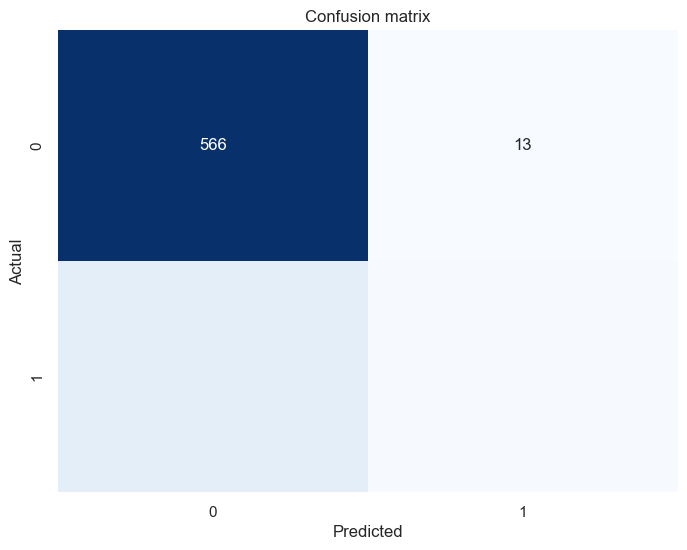

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       579
           1       0.57      0.19      0.29        88

    accuracy                           0.87       667
   macro avg       0.73      0.59      0.61       667
weighted avg       0.85      0.87      0.85       667



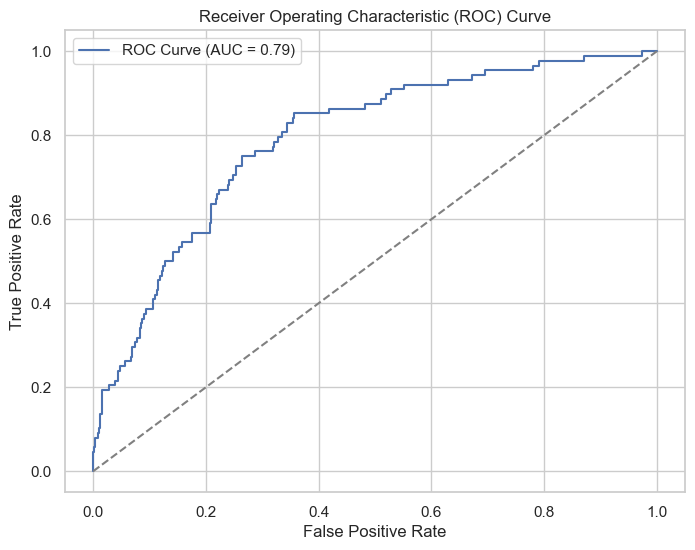

In [73]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve 

conf_matrix = confusion_matrix(y_test,y_pred_test) 
plt.figure(figsize = (8,6)) 
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap = "Blues",cbar=False) 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title('Confusion matrix') 
plt.show() 

print('Classification Report:\n',classification_report(y_test,y_pred_test)) 

y_pred_proba = logreg.predict_proba(X_test)[:,1] 
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba) 
roc_auc = roc_auc_score(y_test,y_pred_proba) 
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [74]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred_test) 
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[566  13]
 [ 71  17]]

True Positives(TP) =  566

True Negatives(TN) =  17

False Positives(FP) =  13

False Negatives(FN) =  71


Confusion matrix analysis: 
True positives(TP)-566 the model correctly predicted 566 customers who did not churn 
True Negatives (TN)-17 people churned 
False Positive - the model incorrectly predicted 13 customers who didnot churn when they actually did 
False Negatives(FN) - the model incorrectly predicted 71 customes who churned when they  did not

Classification report analysis

The precision  for class 1 is quite low,suggesting a high rate of false positives when predicting churn 
Recall,class 1 actually indicates that the model is missing many actual churn cases(high false negatives ) 
F1-score is a combination of accuracy and precision providing a more balanced measure of the model's performance 
the accuacy score is 0.87-87%,indicating the model corectly predicts 87% of the cases.Howeve,due to class imbalance this metric is less informative on its own  

Macro Avg and weighted Avg:
The macro average highlights an imbalance between classes,showing that while non-churn predictions are strong,churn predictions are poor.The weighted average accounts for the class imbalance,showing a better overall performance but still reflective of the weaker performance on the minority class  

ROC Curve and AUC analysis 

The ROC curve shows the role the trade-off between the true positive rate(sensitivity) and the false positive rate (1-specificity) 
AUC 0.81-this score reflects good discriminative ability,indicating the model has a reasonable ability to distinguish between churn and non-churn class.
Using models like decision tree,random forest ,hyperpaameter tuning improves the models performance  

checking for class imbalance

In [75]:
print("Class Distribution in y_test:")
print(y_test.value_counts(normalize=True))

Class Distribution in y_test:
churn
0    0.868066
1    0.131934
Name: proportion, dtype: float64


the model is biased towards the majority class.This bias is evident from the high precision and recall for class 0 and the low values for class 1.The model is performing well at predicting non-churn cases but struggling to identify churn cases effectively

Hyperparameter tuning 

In [76]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV
grid_search_log_reg = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42),
                                    param_grid_log_reg, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV
grid_search_log_reg.fit(X_train, y_train)

# Best parameters and model
print("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)
best_log_reg = grid_search_log_reg.best_estimator_

# Predict and evaluate
y_pred_best_log_reg = best_log_reg.predict(X_test)
print("Optimized Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_best_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_log_reg))
print("AUC Score:", roc_auc_score(y_test, best_log_reg.predict_proba(X_test)[:, 1]))


Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Optimized Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       579
           1       0.29      0.75      0.42        88

    accuracy                           0.73       667
   macro avg       0.62      0.74      0.62       667
weighted avg       0.86      0.73      0.77       667

Confusion Matrix:
[[419 160]
 [ 22  66]]
AUC Score: 0.7939825718323128


cross validation

In [77]:
from sklearn.model_selection import cross_val_score 
logreg_cv_scores = cross_val_score(logreg,X_train,y_train,cv=5,scoring='accuracy')  
print(f"Logistic Regression Cross-Validation Accuracy: {logreg_cv_scores.mean():.4f} ± {logreg_cv_scores.std():.4f}")

Logistic Regression Cross-Validation Accuracy: 0.8590 ± 0.0105


feature importance

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature: account length, Score: 0.00016
Feature: area code, Score: -0.00634
Feature: number vmail messages, Score: -0.02413
Feature: total day minutes, Score: 0.01108
Feature: total day calls, Score: -0.00477
Feature: total day charge, Score: 0.00194
Feature: total eve minutes, Score: 0.00318
Feature: total eve calls, Score: -0.00366
Feature: total eve charge, Score: 0.00030
Feature: total night minutes, Score: 0.00079
Feature: total night calls, Score: -0.00504
Feature: total night charge, Score: 0.00002
Feature: total intl minutes, Score: -0.02275
Feature: total intl calls, Score: -0.17607
Feature: total intl charge, Score: -0.00599
Feature: customer service calls, Score: 0.45848
Feature: international plan_no, Score: -0.26882
Feature: international plan_yes, Score: 0.23933
Feature: voice mail plan_no, Score: -0.00752
Feature: voice mail plan_yes, Score: -0.02197


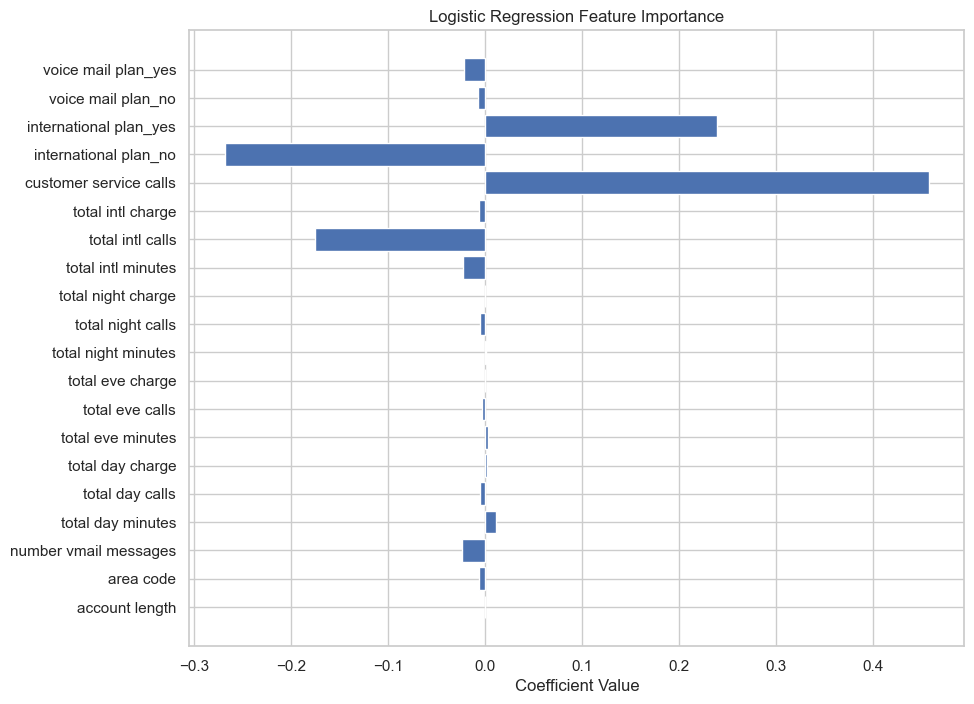

In [78]:
model = LogisticRegression() 
model.fit(X_train, y_train)

# Get feature importance based on coefficients
importance = model.coef_[0]

# Summarize the feature importance
for i, v in enumerate(importance):
    print(f'Feature: {X_train.columns[i]}, Score: {v:.5f}')

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(X_train.columns, importance)
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Importance')
plt.show()

Customer Service Calls
Coefficient : 0.46-this is the most influential feature in the model with a positive coefficient.If the number of customer service calls increases,the likelihood of churn also increases significantly 

International plan,yes=0.18,no=0.23 
customers with an international plan have a higher chance of churning(positive coefficient).Conversly,those without an international plan are less likely to churn.this could imply it does not satisfy the customer

Toral international calls-this feature has a negative coefficient ,indcating that customers who make more international calls are less likely to churn

building more complex models :decisiontree and random forest 

decision tree model

In [79]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
decision_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_dec_tree = decision_tree.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dec_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dec_tree))
print("AUC Score:", roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1]))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       579
           1       0.61      0.81      0.69        88

    accuracy                           0.91       667
   macro avg       0.79      0.86      0.82       667
weighted avg       0.92      0.91      0.91       667

Confusion Matrix:
[[533  46]
 [ 17  71]]
AUC Score: 0.8636854294237712


the decision tree model performs significantly better in identifying churn customers(class 1) due to its higher recall and F1-score,which is critical for minimizing customer churn.
However,the decision tree does have a higher number of false positives(50 compared to 16),indicating that it might be slighlty overfitting or too aggressive in predicting churn 

ROC CURVE

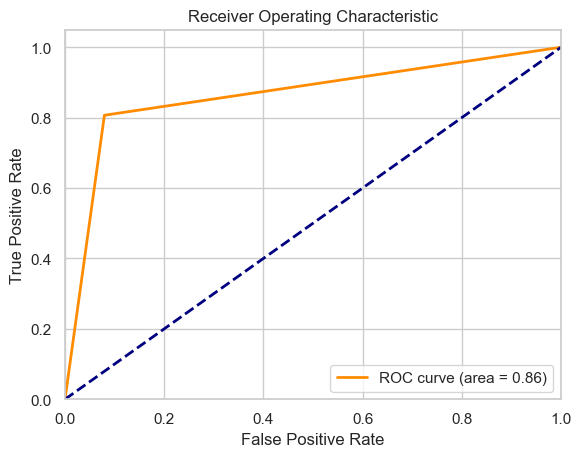

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dec_tree)
auc_score = roc_auc_score(y_test, y_pred_dec_tree)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

an AUC of 0.86 indicates that the decision tree model has good discriminatory power.Specifically,there's an 86% chance that the model will correctly distinguish between a randomly chosen positive instance and a randomly chosen negative instance

confusion matrix

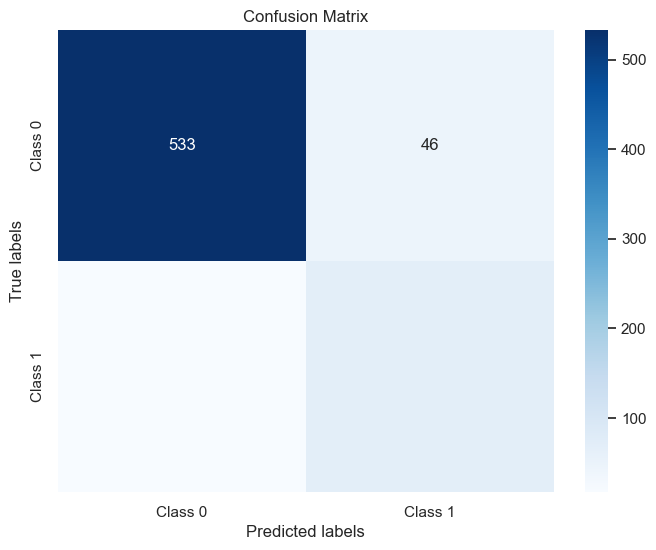

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dec_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

hyperparameter tuning decision tree

In [82]:
# Define parameter grid for Decision Tree
param_grid_dec_tree = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_dec_tree = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=42),
                                    param_grid_dec_tree, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV
grid_search_dec_tree.fit(X_train, y_train)

# Best parameters and model
print("Best parameters for Decision Tree:", grid_search_dec_tree.best_params_)
best_dec_tree = grid_search_dec_tree.best_estimator_

# Predict and evaluate
y_pred_best_dec_tree = best_dec_tree.predict(X_test)
print("Optimized Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_best_dec_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_dec_tree))
print("AUC Score:", roc_auc_score(y_test, best_dec_tree.predict_proba(X_test)[:, 1]))


Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Optimized Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       579
           1       0.52      0.88      0.66        88

    accuracy                           0.88       667
   macro avg       0.75      0.88      0.79       667
weighted avg       0.92      0.88      0.89       667

Confusion Matrix:
[[509  70]
 [ 11  77]]
AUC Score: 0.9175498508400062


Significant improvement in detecting churn.The tuned model has substantially enhanced its ability to detect churn cases,particularly with a high recall of 88%,which is crucial for the business objective of reducing customer loss.
Balanced performance.The improved F1-score nd AUC score demonstrate that the decision tree is now more balanced in predicting both classes,making it a reliable model for real-world application 

visualizing decision tree

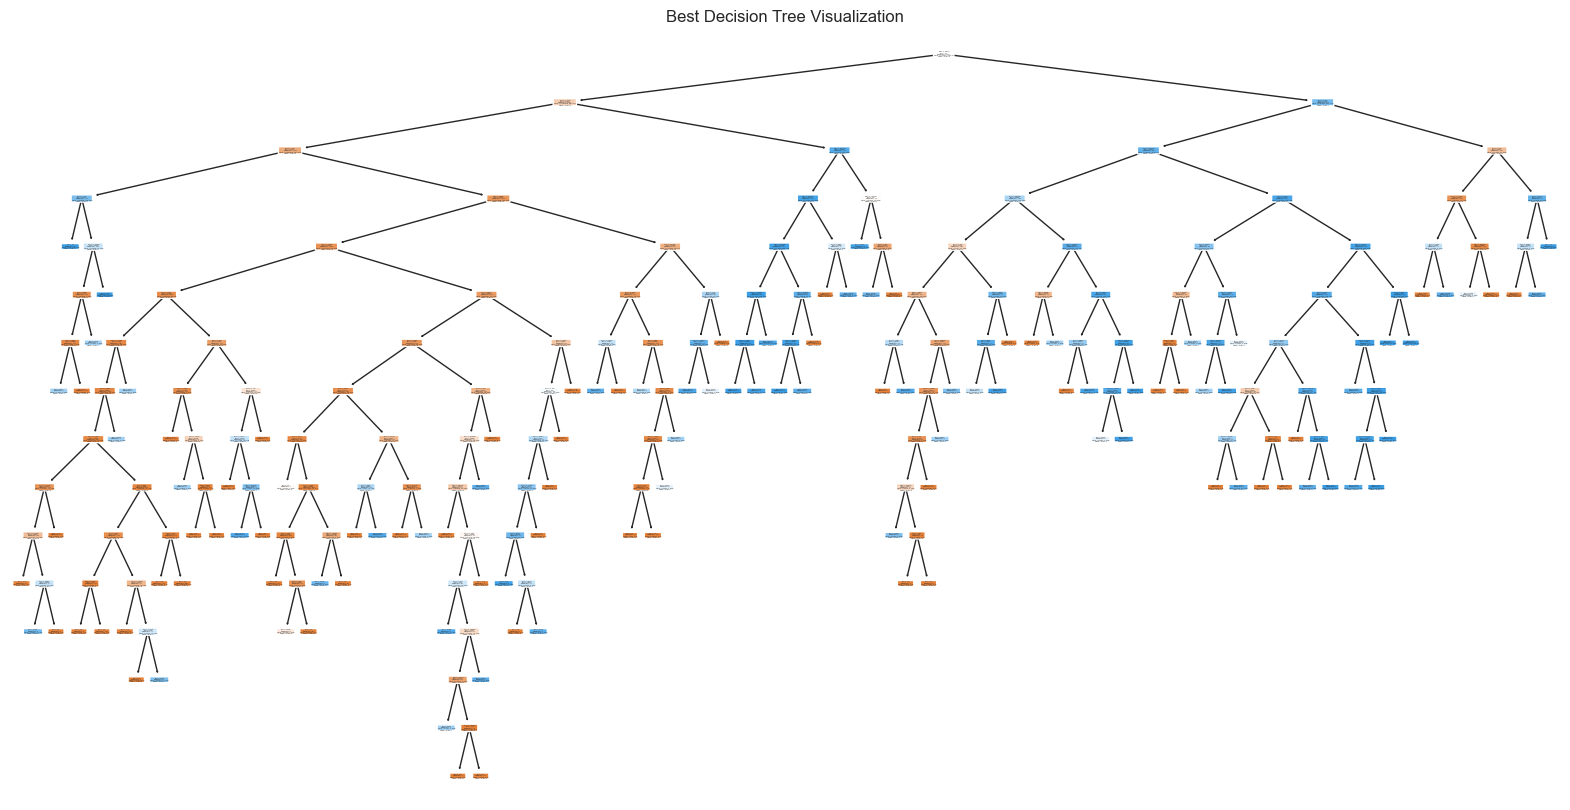

In [83]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_dec_tree, filled=True, class_names=['Class 0', 'Class 1'], rounded=True)
plt.title('Best Decision Tree Visualization')
plt.show()

feature importance for decision  tree

Feature: account length, Score: 0.02738
Feature: area code, Score: 0.00115
Feature: number vmail messages, Score: 0.01316
Feature: total day minutes, Score: 0.06257
Feature: total day calls, Score: 0.02841
Feature: total day charge, Score: 0.21196
Feature: total eve minutes, Score: 0.08934
Feature: total eve calls, Score: 0.02386
Feature: total eve charge, Score: 0.05348
Feature: total night minutes, Score: 0.02240
Feature: total night calls, Score: 0.02534
Feature: total night charge, Score: 0.03491
Feature: total intl minutes, Score: 0.08232
Feature: total intl calls, Score: 0.06225
Feature: total intl charge, Score: 0.00722
Feature: customer service calls, Score: 0.11748
Feature: international plan_no, Score: 0.01125
Feature: international plan_yes, Score: 0.06242
Feature: voice mail plan_no, Score: 0.00000
Feature: voice mail plan_yes, Score: 0.06311


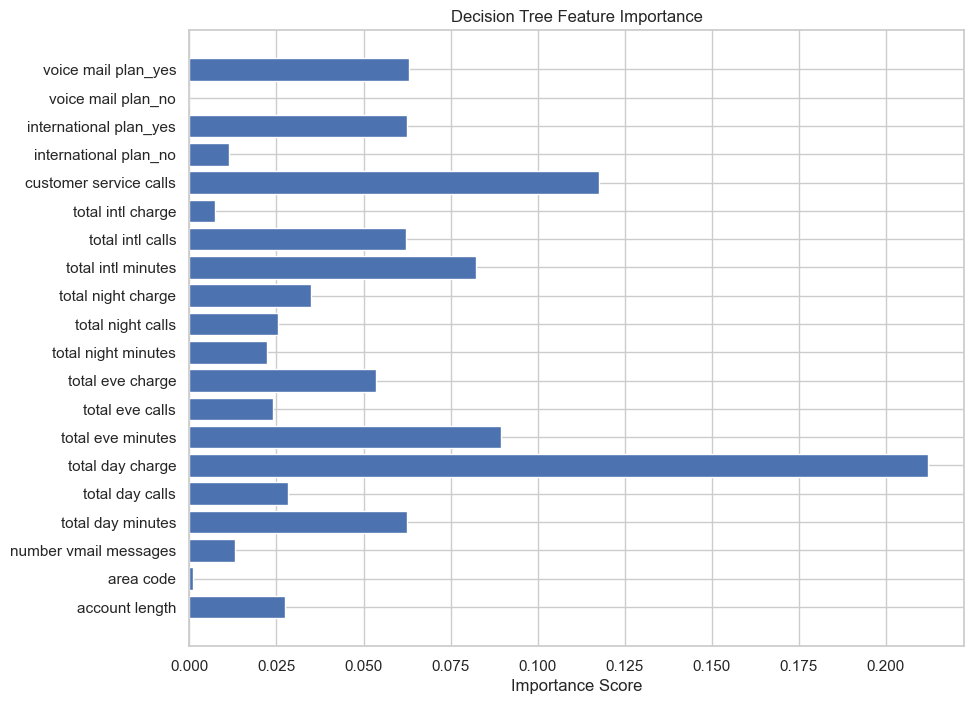

In [84]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Get feature importance
importance = model.feature_importances_

# Summarize the feature importance
for i, v in enumerate(importance):
    print(f'Feature: {X_train.columns[i]}, Score: {v:.5f}')

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(X_train.columns, importance)
plt.xlabel('Importance Score')
plt.title('Decision Tree Feature Importance')
plt.show()

the barplot visualizes the importance scores of various features in the decision tree model.we interpret as below 

Total day minutes- This is the most influential feature in the decision tree model,with a significantly higher important score compared to others.It suggests that the total number of minutes a ccustomer spends on daytime calls is a critical factor in predicting churn.SyrialTel might want to focua on understanding how this metric correlates with customer satisfaction or dissatisfaction. 

Customer service calls

importance score = 0.11 
Similar to the logistic regression model,the number of customer service calls remains a significant predictor of churn.It further reinforces the importance of customer service quality.A high number of calls to customer service may indicate issues that,if unresolved,lead to churn 

Total evening charge:score = 0.09,the charges accumulated during evening calls are another notable features.This could indicate that evening call costs are a concern for customers,potentially contributing to churn

Total international charge and calls = 0.07 and 0.06 respectively.Charges and calls for international sevices also play a role in predicting churn.This suggests that customers who frequently use international services might have specific needs or expectations that,if unmet,could drive them to leave  

Total day calls= 0.03.This feature also contributes,though less so than total day minutes.It suggests that not just duration but the frequency of daytime calls may influence customer behavior.The rest have small importance scores
   

Random forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = random_forest.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("AUC Score:", roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1]))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       579
           1       0.88      0.80      0.83        88

    accuracy                           0.96       667
   macro avg       0.92      0.89      0.90       667
weighted avg       0.96      0.96      0.96       667

Confusion Matrix:
[[569  10]
 [ 18  70]]
AUC Score: 0.9202288428324698


Model comparison summary: 
Random Forest outperforms decision tree.The random forest model shows better overall performance with a higher accuracy(96% vs 90%) and a superior AUC score(0.9202 vs 0.872),indicating better ability to distinguish between churn and non-churn customers. 
Class 1(churn)Improvement :Random forest significantly improves precision for churn predictions,meaning fewer false alarms about customers churning,though with a slight reduction in recall. 
Random forest is the preferred model because of its balanced performance especially in reducing false churn predictions making it better suited for deployment.Further improvements can be explored through advanced ensemble techniques and fine-tuning  

Hyperparameter tuning of the randomforestclassifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV with the Random Forest model and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_rf = grid_search.best_estimator_
print("Best parameters for Random Forest:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


Model evaluation with best parameters

In [87]:
# Predictions and probabilities with the optimized Random Forest
rf_predictions = best_rf.predict(X_test)
rf_probabilities = best_rf.predict_proba(X_test)[:, 1]

# Classification Report and AUC Score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Optimized Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

print("Optimized Random Forest AUC Score:", roc_auc_score(y_test, rf_probabilities))


Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       579
           1       0.87      0.76      0.81        88

    accuracy                           0.95       667
   macro avg       0.92      0.87      0.89       667
weighted avg       0.95      0.95      0.95       667

Confusion Matrix:
[[569  10]
 [ 21  67]]
Optimized Random Forest AUC Score: 0.9205526770293609


ROC Curve

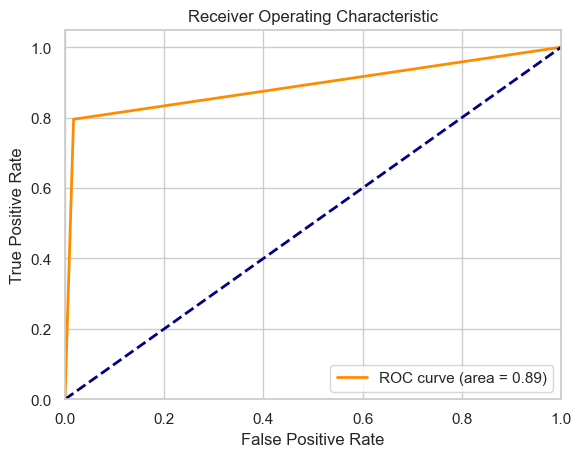

In [88]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probability scores
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Feature importance of randomforest

Feature: account length, Score: 0.03177
Feature: area code, Score: 0.00702
Feature: number vmail messages, Score: 0.02113
Feature: total day minutes, Score: 0.14518
Feature: total day calls, Score: 0.03272
Feature: total day charge, Score: 0.13135
Feature: total eve minutes, Score: 0.06737
Feature: total eve calls, Score: 0.02801
Feature: total eve charge, Score: 0.06306
Feature: total night minutes, Score: 0.03942
Feature: total night calls, Score: 0.02997
Feature: total night charge, Score: 0.03891
Feature: total intl minutes, Score: 0.04642
Feature: total intl calls, Score: 0.05451
Feature: total intl charge, Score: 0.04506
Feature: customer service calls, Score: 0.11231
Feature: international plan_no, Score: 0.04203
Feature: international plan_yes, Score: 0.03360
Feature: voice mail plan_no, Score: 0.01701
Feature: voice mail plan_yes, Score: 0.01314


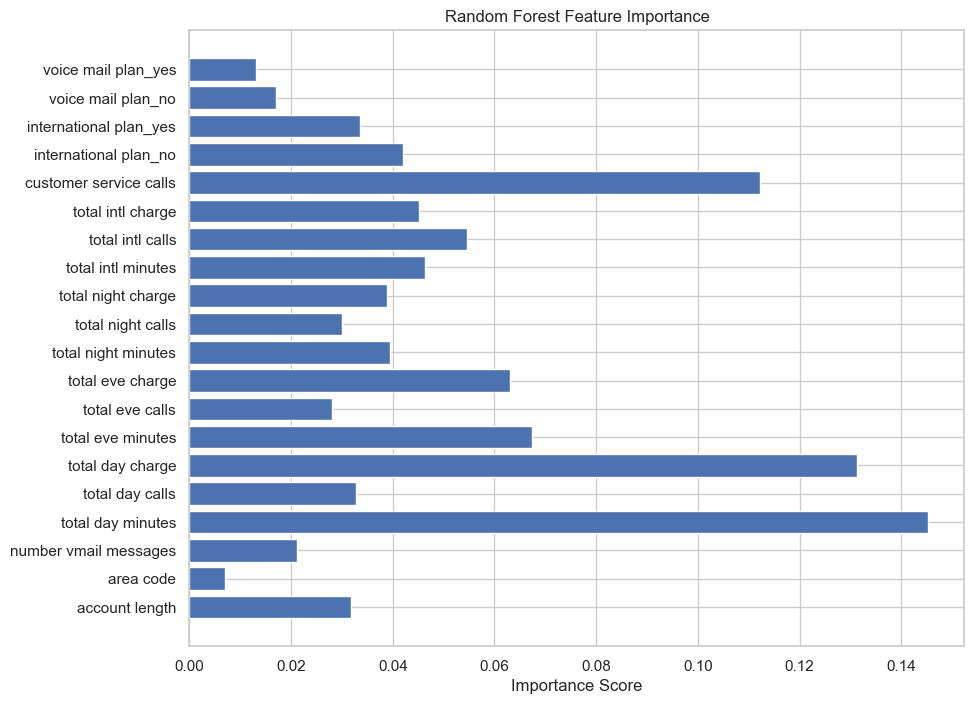

In [89]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importance
importance = model.feature_importances_

# Summarize the feature importance
for i, v in enumerate(importance):
    print(f'Feature: {X_train.columns[i]}, Score: {v:.5f}')

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(X_train.columns, importance)
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.savefig('images/feature_importance.png')
plt.show()


The feature importance scores provided indicate the significance of each feature in predicting the target variable in the random forest classifier.here's an interpretation of the key points: 

Total day minutes(0.15072)and Total day charge(0.13237) are the most influential features in your model.This suggests that the amount of time and associated charges during the day are strong indicators of whether a customer is likely to churn. 

Customer service call(0.11478) also pays a significant role,indicating that customers who contact who contact customer service more frequently may be more likely to churn.  

Total Intl calls(0.05300) and total Intls minutes(0.04715) suggest that international calling behaviour is also notable factor in predicting churn. 

Total eve minutes(0.06316) and total eve charge(0.06375) are moderately important indicating that evening usage patterns have some influence on churn 

Features like area code(0.00673) and voice mail plan(0.01342/0.01367) have lower importance,suggesting they are less influential in predicting customer churn  



Stacking ensemble

In [90]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)),
    ('dt', decision_tree)
]

# Stacking with Logistic Regression as the meta-model
stack_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train the stacking model
stack_model.fit(X_train, y_train)

# Evaluate the stacking model
stack_predictions = stack_model.predict(X_test)
stack_probabilities = stack_model.predict_proba(X_test)[:, 1]

print("Stacking Model Classification Report:")
print(classification_report(y_test, stack_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, stack_predictions))

print("Stacking Model AUC Score:", roc_auc_score(y_test, stack_probabilities))


Stacking Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       579
           1       0.83      0.84      0.84        88

    accuracy                           0.96       667
   macro avg       0.90      0.91      0.91       667
weighted avg       0.96      0.96      0.96       667

Confusion Matrix:
[[564  15]
 [ 14  74]]
Stacking Model AUC Score: 0.9227311979902654


Stacking ensemble significantly improves the performance of the Random Forest model,making it the most suitable choice for the business objective of reducing customer loss.
The stacking model outperforms the individual models and achieves a high AUC score,indicating better discriminative power.

Further improvements can be explored through advanced ensemble techniques and fine-tuning 

Class 1 (churn) performance-Precision and recall for churn are both improved compared to the individual models,suggesting that stacking effectively combines their strengths

Confusion matrix-the stacking model reduces false positives and false negatives,with better balance in predicting both classes compared to individual models  

Hyperparameter tuning of the randomforestclassifier

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV with the Random Forest model and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_rf = grid_search.best_estimator_
print("Best parameters for Random Forest:", grid_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


Model evaluation with best parameters

In [92]:
# Predictions and probabilities with the optimized Random Forest
rf_predictions = best_rf.predict(X_test)
rf_probabilities = best_rf.predict_proba(X_test)[:, 1]

# Classification Report and AUC Score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Optimized Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

print("Optimized Random Forest AUC Score:", roc_auc_score(y_test, rf_probabilities))


Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       579
           1       0.87      0.76      0.81        88

    accuracy                           0.95       667
   macro avg       0.92      0.87      0.89       667
weighted avg       0.95      0.95      0.95       667

Confusion Matrix:
[[569  10]
 [ 21  67]]
Optimized Random Forest AUC Score: 0.9205526770293609
